In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('life expectancy.csv')
df=pd.DataFrame(df)

In [ ]:
df.columns=['Country', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable']
df.columns

Index(['Country', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

# Raw Data collection and combining

In [ ]:
df1=pd.read_csv('gdp_per_capita.csv')
df1=pd.DataFrame(df1)

In [ ]:
df1.columns=['Country', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65']
df1.columns

Index(['Country', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65'],
      dtype='object')

In [ ]:
df1=df1.drop([ '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000','Unnamed: 65','Code'],axis=1)

In [ ]:
df1= df1.melt(id_vars=['Country'], var_name='Year', value_name='GDP per capita')
df1['Year'] = df1['Year'].astype(int)
#transforming to correct format

In [ ]:
main_df=df.merge(df1,on=['Country','Year'],how='left')
#mergin the datasets

In [ ]:
df2=pd.read_csv('Death rate per 1000 people.csv')
df2=pd.DataFrame(df2)

In [ ]:
df2.columns=['Country', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67']

In [ ]:
df2=df2.drop([ '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000','2021','2022','Unnamed: 67','Country Code','Indicator Name','Indicator Code'],axis=1)

In [ ]:
df2= df2.melt(id_vars=['Country'], var_name='Year', value_name='Death rate per 1000 people')
df2['Year'] = df2['Year'].astype(int)

In [ ]:
main_df=main_df.merge(df2,on=['Country','Year'],how='left')
#merging dataset

In [ ]:
df3=pd.read_csv('Education expenditure(% of GDP).csv')
df3=pd.DataFrame(df3)

In [ ]:
df3=df3.drop(['Country Code'],axis=1)

In [ ]:
df3= df3.melt(id_vars=['Country'], var_name='Year', value_name='Education expenditure(%)')
df3['Year'] = df3['Year'].astype(int)

In [ ]:
main_df=main_df.merge(df3,on=['Country','Year'],how='left')

In [ ]:
df4=pd.read_csv('20 Years world Population Dataset (2000-2020).csv')
df4=pd.DataFrame(df4)

In [ ]:
main_df=main_df.merge(df4,on=['Country','Year'],how='left')

In [ ]:
main_df=main_df.drop(['PopMale','PopFemale','PopDensity'],axis=1)

In [ ]:
main_df.columns=['Country', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable', 'GDP per capita', 'Death rate per 1000 people',
       'Education expenditure(%)', 'Population']

In [ ]:
df5_1=pd.read_csv('gdp_1.csv')
df5_1=pd.DataFrame(df5_1)
df5_2=pd.read_csv('gdp_2.csv')
df5_2=pd.DataFrame(df5_2)
df5=df5_1.merge(df5_2,on=['Country (or dependent territory)'],how='left')
df5.columns

Index(['Unnamed: 0_x', 'Country (or dependent territory)', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       'Unnamed: 0_y', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object')

In [ ]:
df5=df5.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1)
df5.columns=['Country', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
        '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019']

In [ ]:
df5= df5.melt(id_vars=['Country'], var_name='Year', value_name='GDP')
df5['Year'] = df5['Year'].astype(int)

In [ ]:
main_df=main_df.merge(df5,on=['Country','Year'],how='left')

In [ ]:
df6=pd.read_csv('Infact deaths under 5 (per 1000 live births).csv')
df6=pd.DataFrame(df6)
df6.columns=['Country', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
        '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019','2020']

In [ ]:
df6= df6.melt(id_vars=['Country'], var_name='Year', value_name='Infant deaths(per 1000 live births)')
df6['Year'] = df6['Year'].astype(int)

In [ ]:
main_df=main_df.merge(df6,on=['Country','Year'],how='left')
#final merge of all raw datasets in the required format

In [ ]:
main_df.columns=['Country', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable', 'Income per capita', 'Adult Mortality(per 1000 people)',
       'Education expenditure(%)', 'Population', 'GDP',
       'Infant deaths(per 1000 live births)']

In [ ]:
main_df.head(5)

Country Country Code                      Region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

           IncomeGroup  Year  Life Expectancy World Bank  \
0           Low income  2001                      56.308   
1  Lower middle income  2001                      47.059   
2  Upper middle income  2001                      74.288   
3          High income  2001                         NaN   
4          High income  2001                      74.544   

   Prevelance of Undernourishment      CO2  Health Expenditure %  \
0                            47.8    730.0                   NaN   
1                            67.5  15960.0              4.483516   
2                             4.9   3230.0              7.139524   
3                             NaN    520.0              5.865939   
4                             2.8  97200.0              2.484370   

   Education Expenditure %  ...  Sanitation    Injuries  Communicable  \
0                      NaN  ...         NaN  2179727.10    9689193.70   
1                      NaN  ...         NaN  1392080.71   11190210.53   
2                   3.4587  ...   40.520895   117081.67     140894.78   
3                      NaN  ...   21.788660     1697.99        695.56   
4                      NaN  ...         NaN   144678.14      65271.91   

   NonCommunicable  Income per capita  Adult Mortality(per 1000 people)  \
0       5795426.38                NaN                            11.713   
1       2663516.34         527.333529                            17.789   
2        532324.75        1281.659826                             5.872   
3         13636.64       22970.512213                               NaN   
4        481740.70       31280.755865                             2.047   

   Education expenditure(%)  Population       GDP  \
0                       NaN   21606,992       NaN   
1                       NaN   16945,753   10930.0   
2                    3.4587    3129,701    3928.0   
3                       NaN      67,344    1547.0   
4                       NaN    3302,722  103312.0   

  Infant deaths(per 1000 live births)  
0                               125.3  
1                               198.9  
2                                25.8  
3                                 7.2  
4                                10.9  

[5 rows x 22 columns]

In [ ]:
main_df.isna().sum()

Country                                   0
Country Code                              0
Region                                    0
IncomeGroup                               0
Year                                      0
Life Expectancy World Bank              256
Prevelance of Undernourishment          830
CO2                                     211
Health Expenditure %                    228
Education Expenditure %                1365
Unemployment                            383
Corruption                             2941
Sanitation                             1537
Injuries                                  0
Communicable                              0
NonCommunicable                           0
Income per capita                        50
Adult Mortality(per 1000 people)         94
Education expenditure(%)               1148
Population                              133
GDP                                     263
Infant deaths(per 1000 live births)       0
dtype: int64

In [ ]:
#main_df.to_csv('Life Expectancy Dataset.csv', index=False)
#The combined dataset has been saved as 'Life Expectancy Dataset.csv' and will be in the submission zip.

# Data cleaning

In [ ]:
main_df=pd.read_csv('Life Expectancy Dataset.csv')
main_df=pd.DataFrame(main_df)
#reading the finalized dataset

## 1.Removing special characters

In [ ]:
main_df['Population']=main_df['Population'].str.replace(',','')

## 2.Removing columns that are not needed

In [ ]:
main_df=main_df.drop(['Corruption','Sanitation','Education Expenditure %'],axis=1)

## 3.Checking for duplicate values and dropping them

In [ ]:
main_df.duplicated().any()

True

In [ ]:
main_df=main_df.drop_duplicates()

## 4.Fill missing values of selected columns

In [ ]:
main_df['Education expenditure(%)'].fillna(main_df['Education expenditure(%)'].median(),inplace=True)

## 5.Delete rows with missing values

In [ ]:
main_df.isna().sum()

Country                                  0
Country Code                             0
Region                                   0
IncomeGroup                              0
Year                                     0
Life Expectancy World Bank             188
Prevelance of Undernourishment         684
CO2                                    152
Health Expenditure %                   180
Unemployment                           304
Injuries                                 0
Communicable                             0
NonCommunicable                          0
Income per capita                       44
Adult Mortality(per 1000 people)        59
Education expenditure(%)                 0
Population                             114
GDP                                    195
Infant deaths(per 1000 live births)      0
dtype: int64

In [ ]:
main_df=main_df.dropna(axis=0)

In [ ]:
main_df = main_df.reset_index(drop=True)

## 6.Transforming certain columns to a common format

In [ ]:
numeric_features=['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Unemployment', 'Injuries', 'Communicable',
       'NonCommunicable', 'Income per capita',
       'Adult Mortality(per 1000 people)', 'Education expenditure(%)',
       'Population', 'GDP', 'Infant deaths(per 1000 live births)']

In [ ]:
for i in numeric_features:
    main_df[i]=main_df[i].astype(float)

## 7.Checking for outliers and handling them if any

In [ ]:
for i in numeric_features:

    quart1 = main_df[i].quantile(0.25)
    quart3 = main_df[i].quantile(0.75)
    inter_quart_range = quart3 - quart1

    lower_thresh = quart1 - 1.5 * inter_quart_range
    upper_thresh = quart3 + 1.5 * inter_quart_range

    # Flagging outliers in separate columns
    main_df[f'IsOutlier_{i}'] = (main_df[i] < lower_thresh) | (main_df[i] > upper_thresh)

    #Transforming outliers usng logarithmic transformation
    idx_outlier = main_df.index[main_df[f'IsOutlier_{i}']]
    main_df.loc[idx_outlier, i] = np.log(main_df.loc[idx_outlier, i])



In [ ]:
main_df.head(5)

Country Country Code                      Region  \
0                Angola          AGO          Sub-Saharan Africa   
1               Albania          ALB       Europe & Central Asia   
2  United Arab Emirates          ARE  Middle East & North Africa   
3             Argentina          ARG   Latin America & Caribbean   
4               Armenia          ARM       Europe & Central Asia   

           IncomeGroup  Year  Life Expectancy World Bank  \
0  Lower middle income  2001                    3.851402   
1  Upper middle income  2001                   74.288000   
2          High income  2001                   74.544000   
3  Upper middle income  2001                   73.755000   
4  Upper middle income  2001                   71.800000   

   Prevelance of Undernourishment       CO2  Health Expenditure %  \
0                        4.212128   15960.0              4.483516   
1                        4.900000    3230.0              7.139524   
2                        2.800000   97200.0              2.484370   
3                        3.000000  125260.0              8.371798   
4                       26.100000    3600.0              4.645627   

   Unemployment  ...  IsOutlier_Unemployment  IsOutlier_Injuries  \
0      4.004000  ...                   False               False   
1     18.575001  ...                   False               False   
2      2.493000  ...                   False               False   
3     17.320000  ...                   False               False   
4     10.912000  ...                   False               False   

   IsOutlier_Communicable  IsOutlier_NonCommunicable  \
0                    True                      False   
1                   False                      False   
2                   False                      False   
3                   False                      False   
4                   False                      False   

   IsOutlier_Income per capita  IsOutlier_Adult Mortality(per 1000 people)  \
0                        False                                        True   
1                        False                                       False   
2                        False                                       False   
3                        False                                       False   
4                        False                                       False   

   IsOutlier_Education expenditure(%)  IsOutlier_Population  IsOutlier_GDP  \
0                               False                 False          False   
1                               False                 False          False   
2                               False                 False          False   
3                               False                 False          False   
4                               False                 False          False   

   IsOutlier_Infant deaths(per 1000 live births)  
0                                           True  
1                                          False  
2                                          False  
3                                          False  
4                                          False  

[5 rows x 33 columns]

In [ ]:
flagged_cols=[f'IsOutlier_{i}' for i in numeric_features]

In [ ]:
main_df=main_df.drop(flagged_cols,axis=1) #removing non-required columns

In [ ]:
main_df.head(10)

Country Country Code                      Region  \
0                Angola          AGO          Sub-Saharan Africa   
1               Albania          ALB       Europe & Central Asia   
2  United Arab Emirates          ARE  Middle East & North Africa   
3             Argentina          ARG   Latin America & Caribbean   
4               Armenia          ARM       Europe & Central Asia   
5             Australia          AUS         East Asia & Pacific   
6               Austria          AUT       Europe & Central Asia   
7            Azerbaijan          AZE       Europe & Central Asia   
8               Belgium          BEL       Europe & Central Asia   
9                 Benin          BEN          Sub-Saharan Africa   

           IncomeGroup  Year  Life Expectancy World Bank  \
0  Lower middle income  2001                    3.851402   
1  Upper middle income  2001                   74.288000   
2          High income  2001                   74.544000   
3  Upper middle income  2001                   73.755000   
4  Upper middle income  2001                   71.800000   
5          High income  2001                   79.634146   
6          High income  2001                   78.575610   
7  Upper middle income  2001                   67.054000   
8          High income  2001                   77.973171   
9  Lower middle income  2001                   55.668000   

   Prevelance of Undernourishment            CO2  Health Expenditure %  \
0                        4.212128   15960.000000              4.483516   
1                        4.900000    3230.000000              7.139524   
2                        2.800000   97200.000000              2.484370   
3                        3.000000  125260.000000              8.371798   
4                       26.100000    3600.000000              4.645627   
5                        2.500000      12.753153              7.696229   
6                        2.500000   67910.000000              9.269429   
7                       17.000000   26400.000000              2.755907   
8                        2.500000  118340.000000              8.149888   
9                       17.200000    1740.000000              3.249100   

   Unemployment    Injuries  Communicable  NonCommunicable  Income per capita  \
0      4.004000  1392080.71  1.623055e+01       2663516.34         527.333529   
1     18.575001   117081.67  1.408948e+05        532324.75        1281.659826   
2      2.493000   144678.14  6.527191e+04        481740.70       31280.755865   
3     17.320000  1397676.07  1.507069e+06       8070909.52        7208.373114   
4     10.912000   103371.75  1.222381e+05        767916.19         694.423455   
5      6.740000   612233.81  2.082827e+05       4158052.86       19527.323577   
6      4.010000   240208.86  7.770117e+04       2101883.59       24537.514263   
7     10.910000   235307.74  9.041865e+05       1816141.16         703.683843   
8      6.180000   393056.61  1.603418e+05       2708304.31       22995.157525   
9      0.771000   285885.20  4.179252e+06       1180016.78         518.067474   

   Adult Mortality(per 1000 people)  Education expenditure(%)  Population  \
0                           2.87858                  4.373395  16945753.0   
1                           5.87200                  3.458700   3129701.0   
2                           2.04700                  4.373395   3302722.0   
3                           7.54900                  4.833740  37275644.0   
4                           8.34400                  2.469440   3050686.0   
5                           6.60000                  4.373395  19194676.0   
6                           9.30000                  5.575480   8097755.0   
7                           5.60000                  3.503420   8197295.0   
8                          10.10000                  4.373395  10319026.0   
9                          11.82500                  2.365100   7076728.0   

        GDP  Infant deaths(per 1000 live births)  


## 8.Setting precision for all the numeric features

In [ ]:
for i in numeric_features:
    main_df[i]=main_df[i].round(2) #setting every numeric value to 2 decimal places

In [ ]:
main_df.head(5)

Country Country Code                      Region  \
0                Angola          AGO          Sub-Saharan Africa   
1               Albania          ALB       Europe & Central Asia   
2  United Arab Emirates          ARE  Middle East & North Africa   
3             Argentina          ARG   Latin America & Caribbean   
4               Armenia          ARM       Europe & Central Asia   

           IncomeGroup  Year  Life Expectancy World Bank  \
0  Lower middle income  2001                        3.85   
1  Upper middle income  2001                       74.29   
2          High income  2001                       74.54   
3  Upper middle income  2001                       73.76   
4  Upper middle income  2001                       71.80   

   Prevelance of Undernourishment       CO2  Health Expenditure %  \
0                            4.21   15960.0                  4.48   
1                            4.90    3230.0                  7.14   
2                            2.80   97200.0                  2.48   
3                            3.00  125260.0                  8.37   
4                           26.10    3600.0                  4.65   

   Unemployment    Injuries  Communicable  NonCommunicable  Income per capita  \
0          4.00  1392080.71         16.23       2663516.34             527.33   
1         18.58   117081.67     140894.78        532324.75            1281.66   
2          2.49   144678.14      65271.91        481740.70           31280.76   
3         17.32  1397676.07    1507068.98       8070909.52            7208.37   
4         10.91   103371.75     122238.13        767916.19             694.42   

   Adult Mortality(per 1000 people)  Education expenditure(%)  Population  \
0                              2.88                      4.37  16945753.0   
1                              5.87                      3.46   3129701.0   
2                              2.05                      4.37   3302722.0   
3                              7.55                      4.83  37275644.0   
4                              8.34                      2.47   3050686.0   

        GDP  Infant deaths(per 1000 live births)  
0   10930.0                                 5.29  
1    3928.0                                25.80  
2  103312.0                                10.90  
3  300421.0                                19.00  
4    2118.0                                29.20

In [ ]:
main_df.to_csv('Life Expectancy Dataset(cleaned).csv', index=False)

# Exploratory Data Analysis

In [6]:
main_df=pd.read_csv('Life Expectancy Dataset(cleaned).csv')
main_df=pd.DataFrame(main_df)
#reading the cleaned dataset

In [7]:
main_df

Country Country Code                      Region  \
0                   Angola          AGO          Sub-Saharan Africa   
1                  Albania          ALB       Europe & Central Asia   
2     United Arab Emirates          ARE  Middle East & North Africa   
3                Argentina          ARG   Latin America & Caribbean   
4                  Armenia          ARM       Europe & Central Asia   
...                    ...          ...                         ...   
2413               Uruguay          URY   Latin America & Caribbean   
2414            Uzbekistan          UZB       Europe & Central Asia   
2415               Vanuatu          VUT         East Asia & Pacific   
2416                 Samoa          WSM         East Asia & Pacific   
2417          South Africa          ZAF          Sub-Saharan Africa   

              IncomeGroup  Year  Life Expectancy World Bank  \
0     Lower middle income  2001                        3.85   
1     Upper middle income  2001                       74.29   
2             High income  2001                       74.54   
3     Upper middle income  2001                       73.76   
4     Upper middle income  2001                       71.80   
...                   ...   ...                         ...   
2413          High income  2019                       77.91   
2414  Lower middle income  2019                       71.72   
2415  Lower middle income  2019                       70.47   
2416  Lower middle income  2019                       73.32   
2417  Upper middle income  2019                       64.13   

      Prevelance of Undernourishment        CO2  Health Expenditure %  \
0                               4.21   15960.00                  4.48   
1                               4.90    3230.00                  7.14   
2                               2.80   97200.00                  2.48   
3                               3.00  125260.00                  8.37   
4                              26.10    3600.00                  4.65   
...                              ...        ...                   ...   
2413                            2.50    6490.00                  9.35   
2414                            2.50  116710.00                  5.62   
2415                           12.40     210.00                  3.36   
2416                            4.40     300.00                  6.36   
2417                            6.30      12.99                  9.11   

      Unemployment    Injuries  Communicable  NonCommunicable  \
0             4.00  1392080.71         16.23       2663516.34   
1            18.58   117081.67     140894.78        532324.75   
2             2.49   144678.14      65271.91        481740.70   
3            17.32  1397676.07    1507068.98       8070909.52   
4            10.91   103371.75     122238.13        767916.19   
...            ...         ...           ...              ...   
2413          8.88   130120.49      74036.98        857057.52   
2414          5.85  1087494.20    1913988.83       7059738.93   
2415          1.80    12484.18      26032.56         69213.56   
2416          8.41     6652.84       9095.19         43798.62   
2417          3.35       14.97         16.40      10214261.89   

      Income per capita  Adult Mortality(per 1000 people)  \
0                527.33                              2.88   
1               1281.66                              5.87   
2              31280.76                              2.05   
3               7208.37                              7.55   
4                694.42                              8.34   
...                 ...                               ...   
2413           17688.02                             10.06   
2414            1784.01                              4.60   
2415            3116.30                              5.66   
2416            4322.87                              5.50   
2417            6624.76                              8.61   

      Education ex

## 1. STATISTICAL ANALYSIS

In [78]:
main_df.describe()

Year  Life Expectancy World Bank  \
count  2418.000000                 2418.000000   
mean   2010.025641                   69.647763   
std       5.471800                   12.900371   
min    2001.000000                    3.700000   
25%    2005.000000                   65.457500   
50%    2010.000000                   72.915000   
75%    2015.000000                   77.140000   
max    2019.000000                   84.360000   

       Prevelance of Undernourishment            CO2  Health Expenditure %  \
count                     2418.000000    2418.000000           2418.000000   
mean                         8.075079   25757.428180              6.231671   
std                          7.100332   38887.346987              2.409008   
min                          2.500000      12.150000              1.800000   
25%                          2.500000    1120.000000              4.152500   
50%                          4.700000    7300.000000              6.070000   
75%                         11.300000   37250.000000              8.120000   
max                         31.700000  188860.000000             13.280000   

       Unemployment      Injuries  Communicable  NonCommunicable  \
count   2418.000000  2.418000e+03  2.418000e+03     2.418000e+03   
mean       6.512589  4.100938e+05  7.561891e+05     2.099579e+06   
std        4.117267  5.055435e+05  1.269958e+06     2.519574e+06   
min        0.140000  1.470000e+01  1.575000e+01     1.630000e+01   
25%        3.430000  5.505553e+04  3.583000e+04     2.663492e+05   
50%        5.510000  1.851597e+05  1.463451e+05     1.097599e+06   
75%        8.650000  6.131561e+05  8.592633e+05     2.996458e+06   
max       19.500000  2.397830e+06  6.833120e+06     1.196333e+07   

       Income per capita  Adult Mortality(per 1000 people)  \
count        2418.000000                       2418.000000   
mean         6033.644301                          8.033627   
std          8057.395336                          3.012033   
min            10.510000                          0.800000   
25%           728.362500                          5.950000   
50%          2966.685000                          7.560000   
75%          7295.190000                          9.760000   
max         36795.980000                         15.560000   

       Education expenditure(%)    Population            GDP  \
count               2418.000000  2.418000e+03    2418.000000   
mean                   4.285347  1.074189e+07   74589.552002   
std                    1.346385  1.369201e+07  116383.519731   
min                   -0.760000  1.793000e+01      13.180000   
25%                    3.422500  1.026630e+06    4665.000000   
50%                    4.370000  4.884188e+06   18429.000000   
75%                    5.047500  1.493915e+07   80175.750000   
max                    7.670000  6.112013e+07  526014.000000   

       Infant deaths(per 1000 live births)  
count                          2418.000000  
mean                             27.657510  
std                              28.874011  
min                               2.300000  
25%                               5.347500  
50%                              15.900000  
75%                              38.300000  
max                             117.800000

# Histogram showing the IncomeGroups range of all the counteries

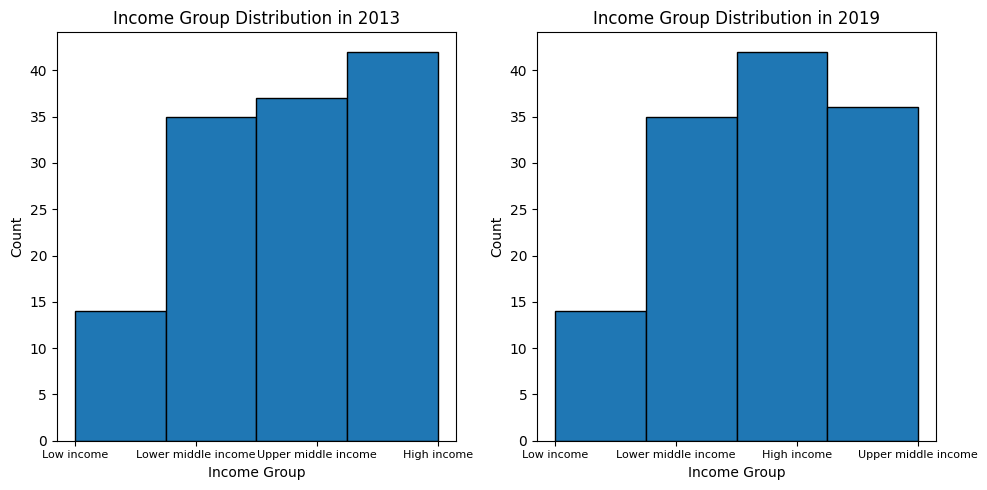

In [81]:
#comparing income distribution between 2013 and 2019
year_2013 = main_df[main_df['Year'] == 2013]
year_2019 = main_df[main_df['Year'] == 2019]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(year_2013['IncomeGroup'], bins=4, edgecolor='black')
axes[0].set_title('Income Group Distribution in 2013')
axes[0].set_xlabel('Income Group')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', labelsize=8)
axes[1].hist(year_2019['IncomeGroup'], bins=4, edgecolor='black')
axes[1].set_title('Income Group Distribution in 2019')
axes[1].set_xlabel('Income Group')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [14]:
df_eda = main_df

## 2. Correlation matrix and Heatmap


In [5]:
selected_columns = ['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2','Health Expenditure %', 'Unemployment', 'Injuries', 'Communicable',
       'NonCommunicable', 'Income per capita','Adult Mortality(per 1000 people)', 'Education expenditure(%)','Population', 'GDP', 'Infant deaths(per 1000 live births)']
corr_matrix = main_df[selected_columns].corr()
corr_matrix

Life Expectancy World Bank  \
Life Expectancy World Bank                             1.000000   
Prevelance of Undernourishment                        -0.390561   
CO2                                                    0.183186   
Health Expenditure %                                   0.279491   
Unemployment                                           0.185511   
Injuries                                               0.027483   
Communicable                                          -0.245367   
NonCommunicable                                        0.023980   
Income per capita                                      0.329020   
Adult Mortality(per 1000 people)                      -0.054078   
Education expenditure(%)                               0.256845   
Population                                             0.030794   
GDP                                                    0.217366   
Infant deaths(per 1000 live births)                   -0.489323   

                                     Prevelance of Undernourishment       CO2  \
Life Expectancy World Bank                                -0.390561  0.183186   
Prevelance of Undernourishment                             1.000000 -0.157733   
CO2                                                       -0.157733  1.000000   
Health Expenditure %                                      -0.328000  0.004411   
Unemployment                                              -0.186926  0.012898   
Injuries                                                  -0.038379  0.095554   
Communicable                                               0.168662 -0.052865   
NonCommunicable                                           -0.046939  0.243923   
Income per capita                                         -0.319701  0.058803   
Adult Mortality(per 1000 people)                          -0.059722 -0.094326   
Education expenditure(%)                                  -0.244897  0.081380   
Population                                                -0.024723  0.153436   
GDP                                                       -0.201932  0.463479   
Infant deaths(per 1000 live births)                        0.523397 -0.169029   

                                     Health Expenditure %  Unemployment  \
Life Expectancy World Bank                       0.279491      0.185511   
Prevelance of Undernourishment                  -0.328000     -0.186926   
CO2                                              0.004411      0.012898   
Health Expenditure %                             1.000000      0.186546   
Unemployment                                     0.186546      1.000000   
Injuries                                         0.047453      0.069490   
Communicable                                    -0.089116     -0.101671   
NonCommunicable                                  0.033410      0.074436   
Income per capita                                0.154454      0.126792   
Adult Mortality(per 1000 people)                 0.173756      0.132149   
Education expenditure(%)                         0.322643      0.103255   
Population                                       0.029972      0.060959   
GDP                                              0.078650     -0.051258   
Infant deaths(per 1000 live births)             -0.339219     -0.133142   

                                     Injuries  Communicable  NonCommunicable  \
Life Expectancy World Bank           0.027483     -0.245367         0.023980   
Prevelance of Undernourishment      -0.038379      0.168662        -0.046939   
CO2                                  0.095554     -0.052865         0.243923   
Health Expenditure %                 0.047453     -0.089116         0.033410   
Unemployment                         0.069490     -0.101671         0.074436   
Injuries                             1.000000      0.221255         0.526255   
Communicable                         0.221255      1.000000         0.149837   
NonCommunicable                      0.526255    

# Picked correlated pairs with a theshold of 0.2

In [7]:
threshold = 0.2
correlated_pairs = []

high_correlation_columns = np.where(np.abs(corr_matrix) > threshold)
column_names = df_eda.columns[list(high_correlation_columns)]

for idx in range(len(column_names[0])):
    if column_names[0][idx] != column_names[1][idx]:
        pair = [column_names[0][idx], column_names[1][idx]]
        correlated_pairs.append(pair)

print(correlated_pairs)

[['Country', 'Country Code'], ['Country', 'IncomeGroup'], ['Country', 'Prevelance of Undernourishment'], ['Country', 'Health Expenditure %'], ['Country', 'Injuries'], ['Country', 'NonCommunicable'], ['Country', 'Income per capita'], ['Country Code', 'Country'], ['Country Code', 'IncomeGroup'], ['Country Code', 'Health Expenditure %'], ['Country Code', 'Injuries'], ['Country Code', 'NonCommunicable'], ['Country Code', 'Income per capita'], ['Region', 'CO2'], ['Region', 'NonCommunicable'], ['IncomeGroup', 'Country'], ['IncomeGroup', 'Country Code'], ['IncomeGroup', 'Injuries'], ['IncomeGroup', 'Income per capita'], ['Life Expectancy World Bank', 'Prevelance of Undernourishment'], ['Life Expectancy World Bank', 'CO2'], ['Life Expectancy World Bank', 'Communicable'], ['Prevelance of Undernourishment', 'Country'], ['Prevelance of Undernourishment', 'Life Expectancy World Bank'], ['Prevelance of Undernourishment', 'Communicable'], ['Prevelance of Undernourishment', 'Income per capita'], ['CO

<ipython-input-7-cf06056dcb3f>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  column_names = df_eda.columns[list(high_correlation_columns)]


# Correlation Heatmap

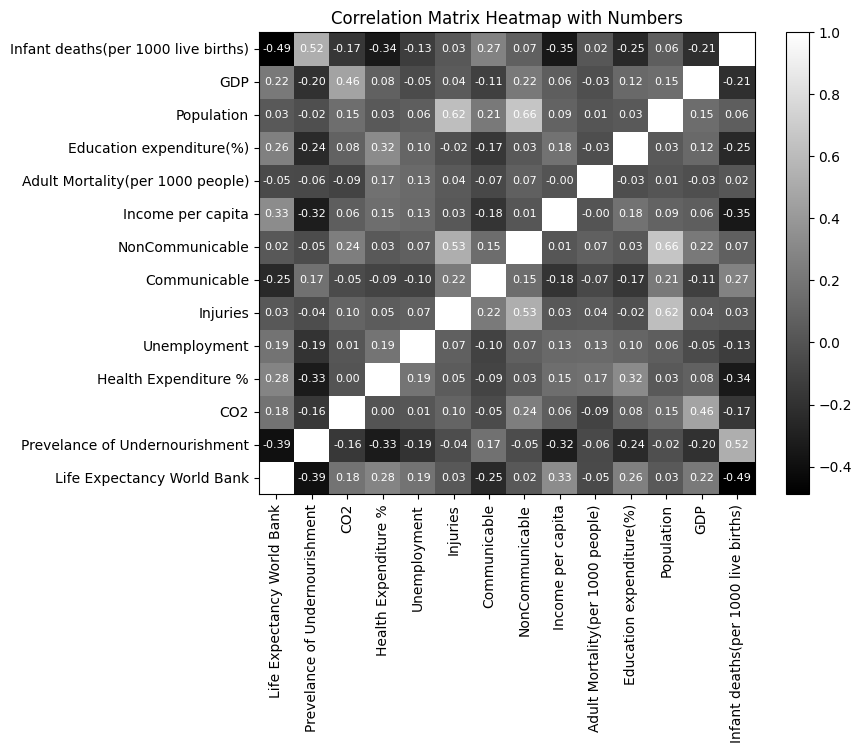

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.pcolor(corr_matrix, cmap='gray')

for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        ax.text(j + 0.5, i + 0.5, '{:.2f}'.format(corr_matrix.iloc[i, j]),
                ha='center', va='center', color='w', fontsize=8)

ax.set_xticks(np.arange(corr_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(corr_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(selected_columns, rotation=90)
ax.set_yticklabels(selected_columns, rotation=0)
plt.colorbar(heatmap)
ax.set_title('Correlation Matrix Heatmap with Numbers')
plt.show()

## UNIVARIATE ANALYSIS

Extracting data for univariate analysis

In [9]:
Country = df_eda.iloc[:]["Country"]
Country_code = df_eda.iloc[:]["Country Code"]
Region = df_eda.iloc[:]["Region"] #heath education expenditure in bar graph
IncomeGroup = df_eda.iloc[:]["IncomeGroup"] #pie chart
Year = df_eda.iloc[:]["Year"]
Life_Expectancy = df_eda.iloc[:]["Life Expectancy World Bank"]
Undernourishment = df_eda.iloc[:]["Prevelance of Undernourishment"]
CO2 = df_eda.iloc[:]["CO2"]
Health_Expenditure = df_eda.iloc[:]["Health Expenditure %"]
Unemployment = df_eda.iloc[:]["Unemployment"]
Injuries = df_eda.iloc[:]["Injuries"]
Communicable = df_eda.iloc[:]["Communicable"]
NonCommunicable = df_eda.iloc[:]["NonCommunicable"]
Income_per_capita = df_eda.iloc[:]["Income per capita"]
Adult_Mortality = df_eda.iloc[:]["Adult Mortality(per 1000 people)"]
Education_expenditure = df_eda.iloc[:]["Education expenditure(%)"]
Population = df_eda.iloc[:]["Population"]
GDP = df_eda.iloc[:]["GDP"]
Infant_deaths = df_eda.iloc[:]["Infant deaths(per 1000 live births)"]

# 3. Univariate boxplots

In [14]:
columns_for_univariate_boxplots = [Life_Expectancy, Health_Expenditure, Unemployment, Adult_Mortality, Education_expenditure]

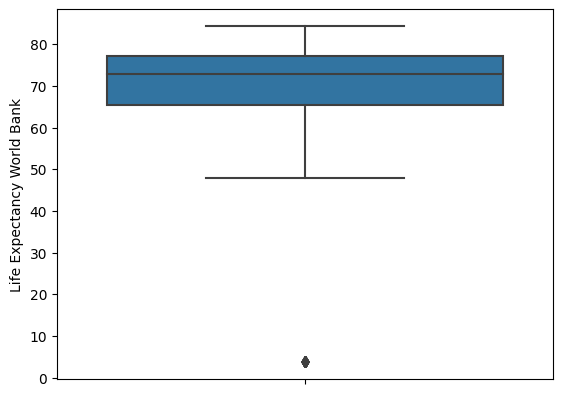

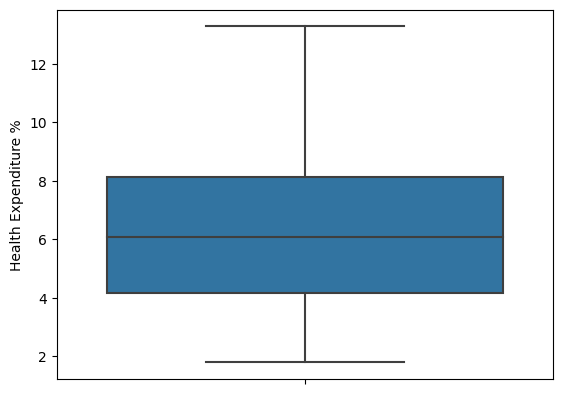

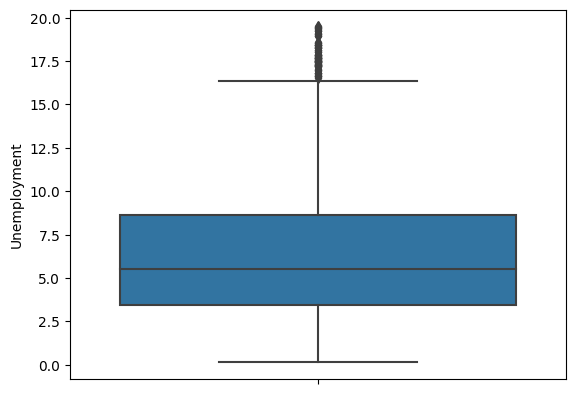

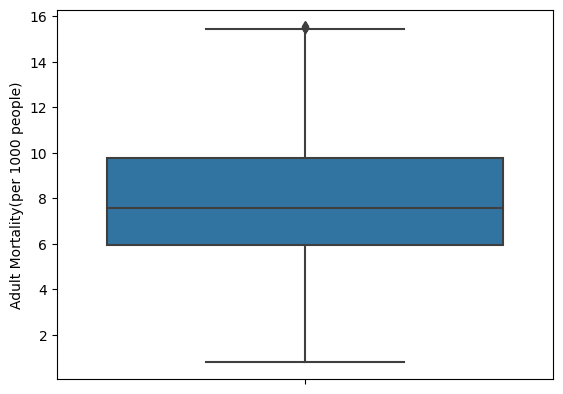

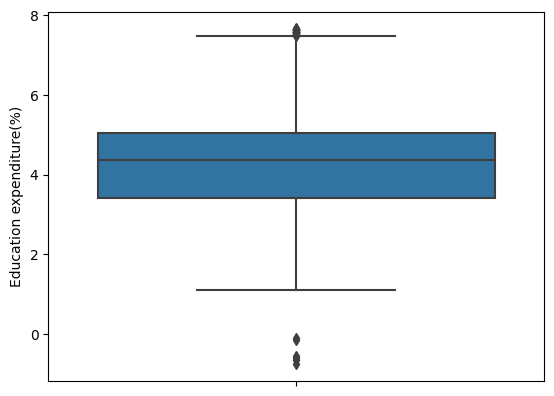

In [15]:
for col in columns_for_univariate_boxplots:

    sns.boxplot(y=col)

    plt.show()

# 4. Univariate histograms

In [16]:
columns_for_univariate_histograms = ['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2','Health Expenditure %', 'Unemployment', 'Injuries', 'Communicable',
       'NonCommunicable', 'Income per capita',
       'Adult Mortality(per 1000 people)', 'Education expenditure(%)',
       'Population', 'GDP', 'Infant deaths(per 1000 live births)']

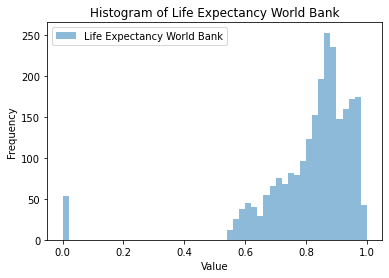

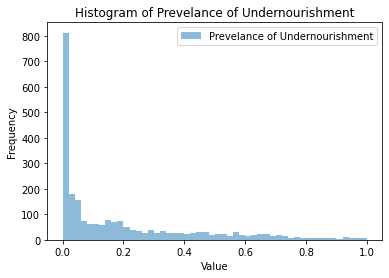

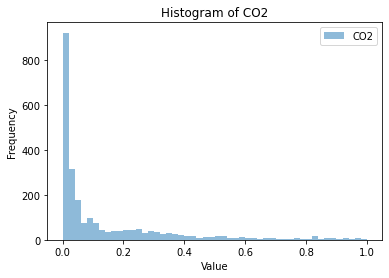

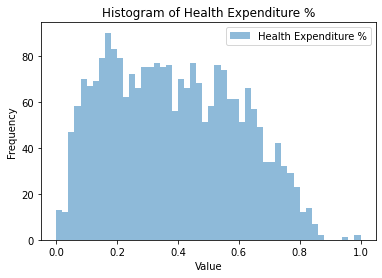

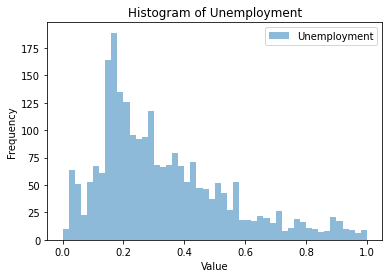

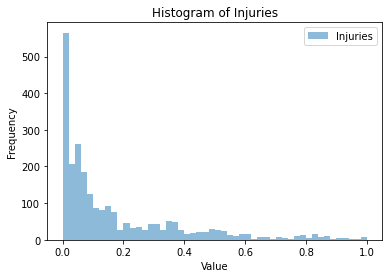

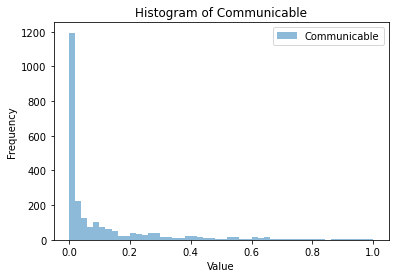

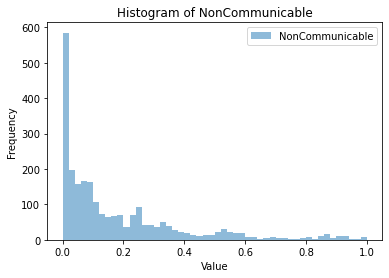

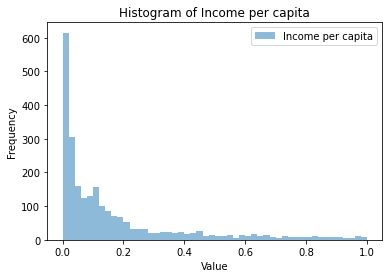

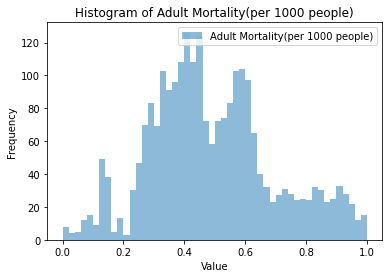

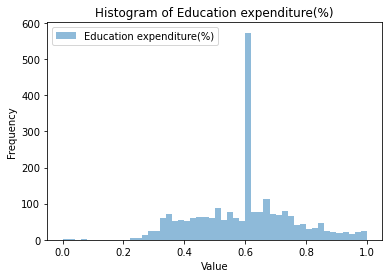

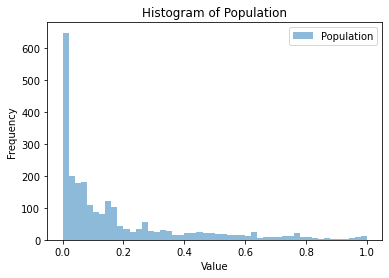

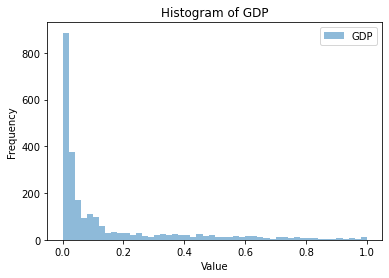

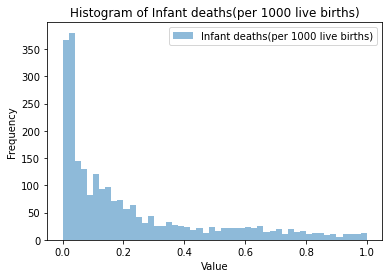

In [17]:
for col in (columns_for_univariate_histograms):
    plt.hist(df_eda[col], bins=50, alpha=0.5, label=col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Histogram of {col}')
    plt.show()

## BIVARIATE ANALYSIS

In [45]:
# for pair in correlated_pairs:
#   print(pair)

# # Run only once
# correlated_pairs.remove(['Country', 'Country Code'])
# correlated_pairs.remove(['Country Code', 'Country'])
# correlated_pairs.remove(['Country Code', 'IncomeGroup'])
# correlated_pairs.remove(['Country Code', 'Health Expenditure %'])
# correlated_pairs.remove(['Country Code', 'Injuries'])

# correlated_pairs.remove(['Country Code', 'Income per capita'])
# correlated_pairs.remove(['Country Code', 'NonCommunicable'])

# correlated_pairs.remove(['IncomeGroup', 'Country Code'])
# correlated_pairs.remove(['Health Expenditure %', 'Country Code'])
# correlated_pairs.remove(['Injuries', 'Country Code'])

for pair in correlated_pairs:
    print(pair)

('Communicable', 'Life Expectancy World Bank')
('NonCommunicable', 'Region')
('IncomeGroup', 'Injuries')
('Communicable', 'Prevelance of Undernourishment')
('Country', 'IncomeGroup')
('Country', 'Health Expenditure %')
('Life Expectancy World Bank', 'Prevelance of Undernourishment')
('Country Code', 'Income per capita')
('Country', 'Income per capita')
('Country', 'NonCommunicable')
('Country Code', 'NonCommunicable')
('Country', 'Injuries')
('CO2', 'Region')
('Income per capita', 'IncomeGroup')
('Health Expenditure %', 'Income per capita')
('Income per capita', 'NonCommunicable')
('Income per capita', 'Injuries')
('Country', 'Prevelance of Undernourishment')
('CO2', 'Communicable')
('CO2', 'NonCommunicable')
('Income per capita', 'Prevelance of Undernourishment')
('CO2', 'Life Expectancy World Bank')


In [50]:
unique_pairs_set = set()
for pair in correlated_pairs:
    unique_pairs_set.add(tuple(sorted(pair)))
unique_pairs_list = list(unique_pairs_set)

correlated_pairs = unique_pairs_list

# correlated_pairs.remove(('Country Code', 'Income per capita'))
# correlated_pairs.remove(('Country Code', 'NonCommunicable'))

for pair in correlated_pairs:
    print(pair)

('Communicable', 'Life Expectancy World Bank')
('NonCommunicable', 'Region')
('IncomeGroup', 'Injuries')
('Communicable', 'Prevelance of Undernourishment')
('Country', 'IncomeGroup')
('Country', 'Health Expenditure %')
('Life Expectancy World Bank', 'Prevelance of Undernourishment')
('Country', 'Income per capita')
('Country', 'NonCommunicable')
('Country', 'Injuries')
('CO2', 'Region')
('Income per capita', 'IncomeGroup')
('Health Expenditure %', 'Income per capita')
('Income per capita', 'NonCommunicable')
('Income per capita', 'Injuries')
('Country', 'Prevelance of Undernourishment')
('CO2', 'Communicable')
('CO2', 'NonCommunicable')
('Income per capita', 'Prevelance of Undernourishment')
('CO2', 'Life Expectancy World Bank')


In [51]:
from itertools import chain
unique_values = set(chain(*correlated_pairs))
unique_values = list(unique_values)
unique_values

['Life Expectancy World Bank',
 'NonCommunicable',
 'Income per capita',
 'Injuries',
 'Health Expenditure %',
 'Communicable',
 'Prevelance of Undernourishment',
 'Country',
 'CO2',
 'IncomeGroup',
 'Region']

In [52]:
df_selected = df_eda.iloc[:, df_eda.columns.isin(unique_values)]
df_selected #selected appropriate features for pair plots with more correlation

Country                      Region          IncomeGroup  \
0                   Angola          Sub-Saharan Africa  Lower middle income   
1                  Albania       Europe & Central Asia  Upper middle income   
2     United Arab Emirates  Middle East & North Africa          High income   
3                Argentina   Latin America & Caribbean  Upper middle income   
4                  Armenia       Europe & Central Asia  Upper middle income   
...                    ...                         ...                  ...   
2413               Uruguay   Latin America & Caribbean          High income   
2414            Uzbekistan       Europe & Central Asia  Lower middle income   
2415               Vanuatu         East Asia & Pacific  Lower middle income   
2416                 Samoa         East Asia & Pacific  Lower middle income   
2417          South Africa          Sub-Saharan Africa  Upper middle income   

      Life Expectancy World Bank  Prevelance of Undernourishment        CO2  \
0                           3.85                            4.21   15960.00   
1                          74.29                            4.90    3230.00   
2                          74.54                            2.80   97200.00   
3                          73.76                            3.00  125260.00   
4                          71.80                           26.10    3600.00   
...                          ...                             ...        ...   
2413                       77.91                            2.50    6490.00   
2414                       71.72                            2.50  116710.00   
2415                       70.47                           12.40     210.00   
2416                       73.32                            4.40     300.00   
2417                       64.13                            6.30      12.99   

      Health Expenditure %    Injuries  Communicable  NonCommunicable  \
0                     4.48  1392080.71         16.23       2663516.34   
1                     7.14   117081.67     140894.78        532324.75   
2                     2.48   144678.14      65271.91        481740.70   
3                     8.37  1397676.07    1507068.98       8070909.52   
4                     4.65   103371.75     122238.13        767916.19   
...                    ...         ...           ...              ...   
2413                  9.35   130120.49      74036.98        857057.52   
2414                  5.62  1087494.20    1913988.83       7059738.93   
2415                  3.36    12484.18      26032.56         69213.56   
2416                  6.36     6652.84       9095.19         43798.62   
2417                  9.11       14.97         16.40      10214261.89   

      Income per capita  
0                527.33  
1               1281.66  
2              31280.76  
3               7208.37  
4                694.42  
...                 ...  
2413           17688.02  
2414            1784.01  
2415            3116.30  
2416            4322.87  
2417            6624.76  

[2418 rows x 11 columns]

## 5. Pairplots for correlated attributes

<Figure size 1300x1700 with 0 Axes>

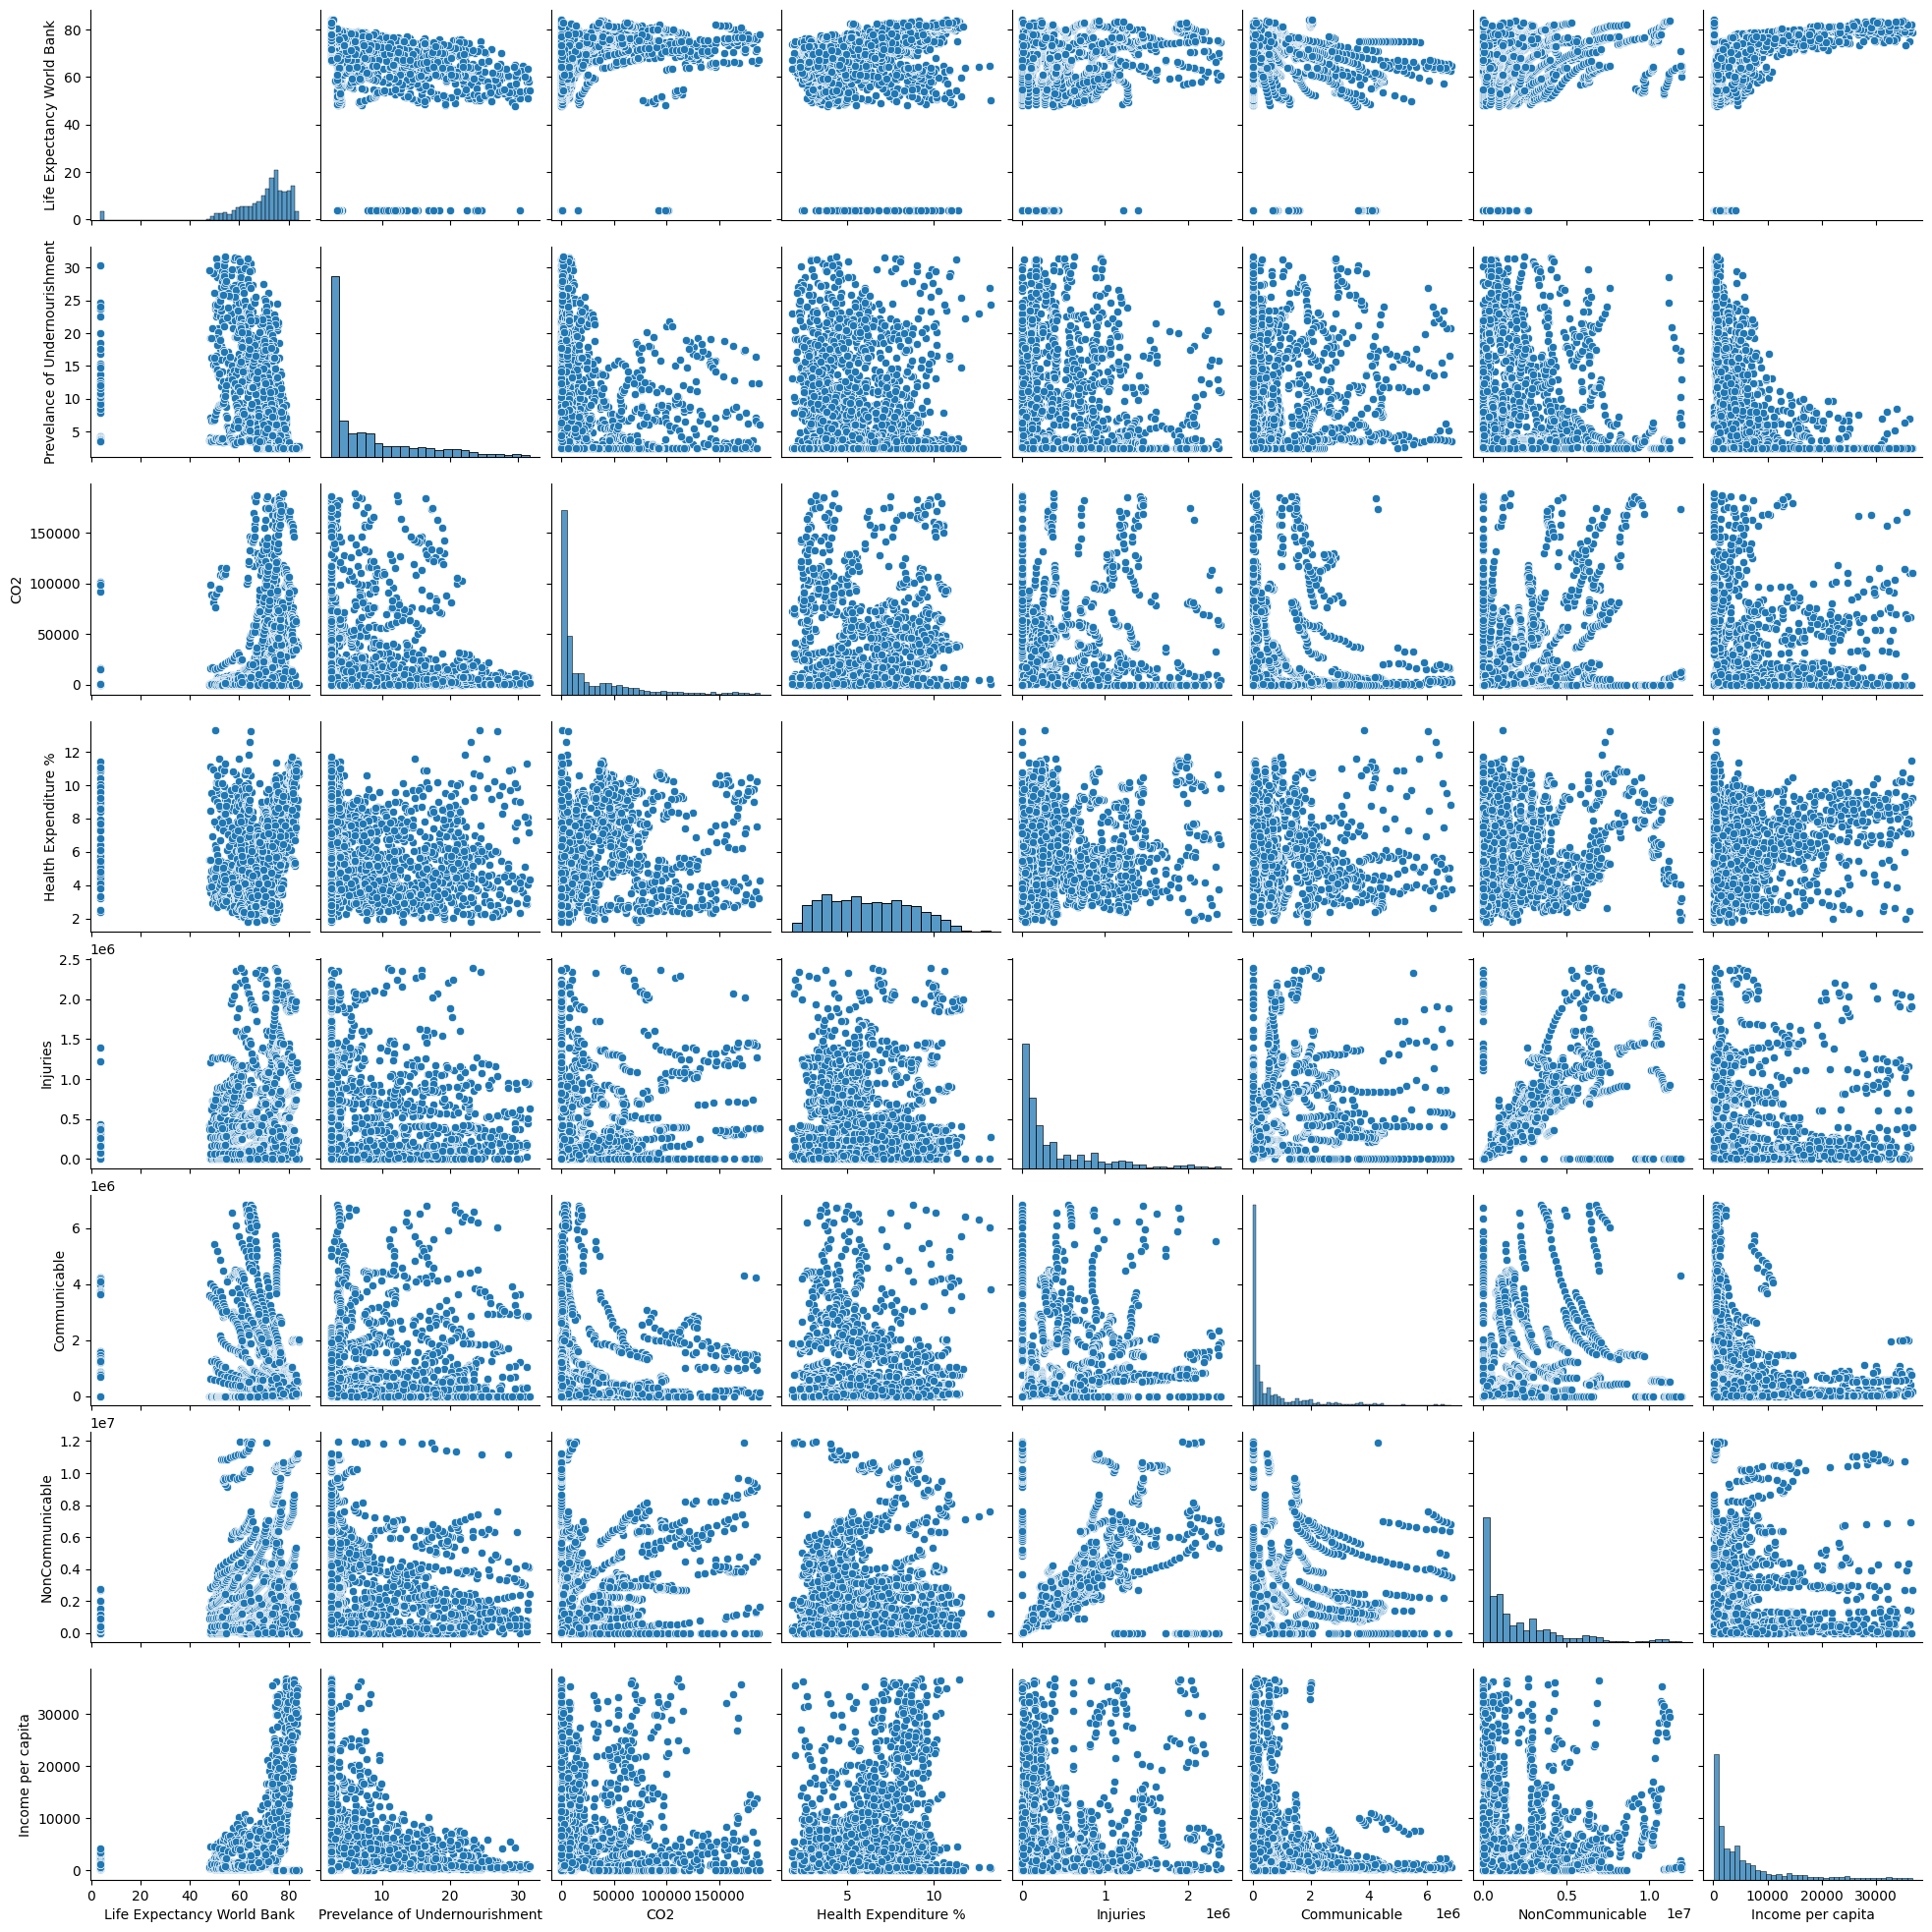

In [53]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df_selected)
plt.show()
#features which had more correlation

## 6. Bar graphs for certain correlations

In [85]:
sel_cols = [
 ('Country', 'IncomeGroup'),
 ('Country', 'Health Expenditure %'),
 ('Life Expectancy World Bank', 'Prevelance of Undernourishment'),
 ('Country', 'Income per capita'),
 ('Country', 'NonCommunicable'),
 ('Country', 'Prevelance of Undernourishment'),
]
correlated_pairs_for_Bar_Graphs = sel_cols


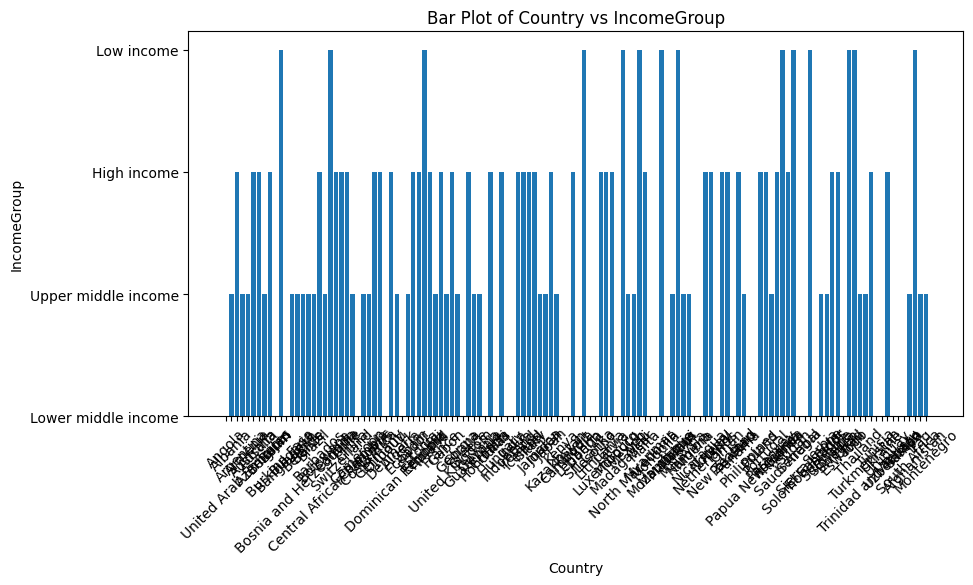

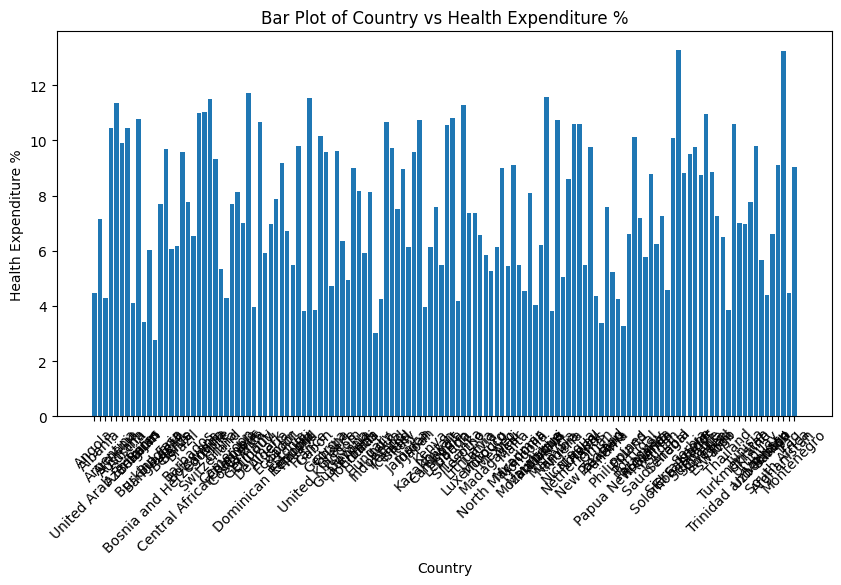

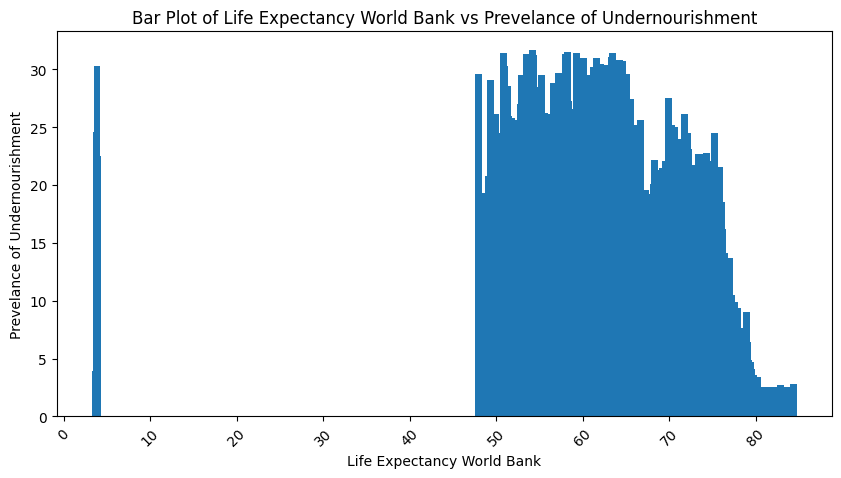

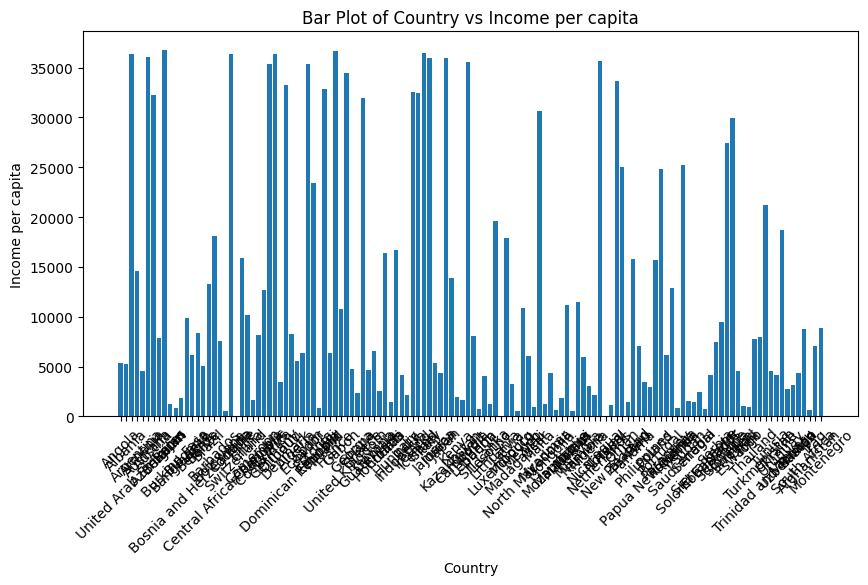

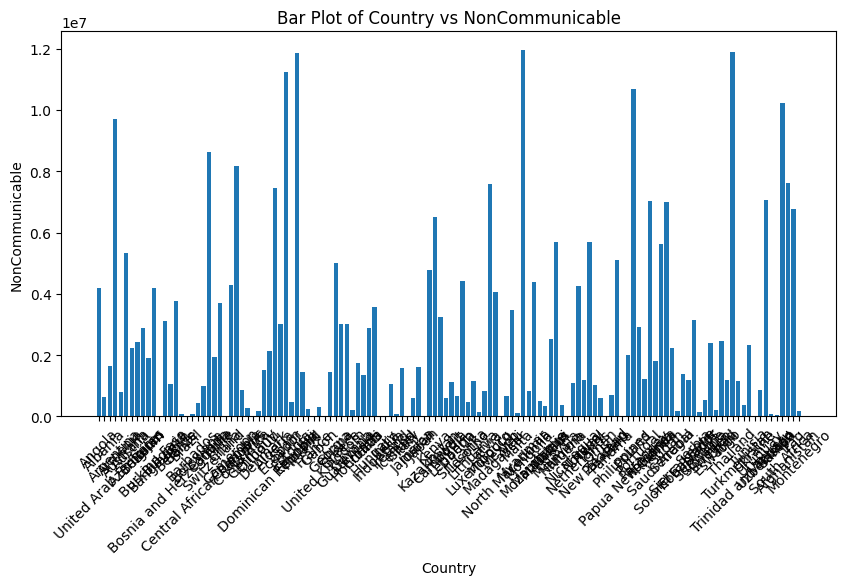

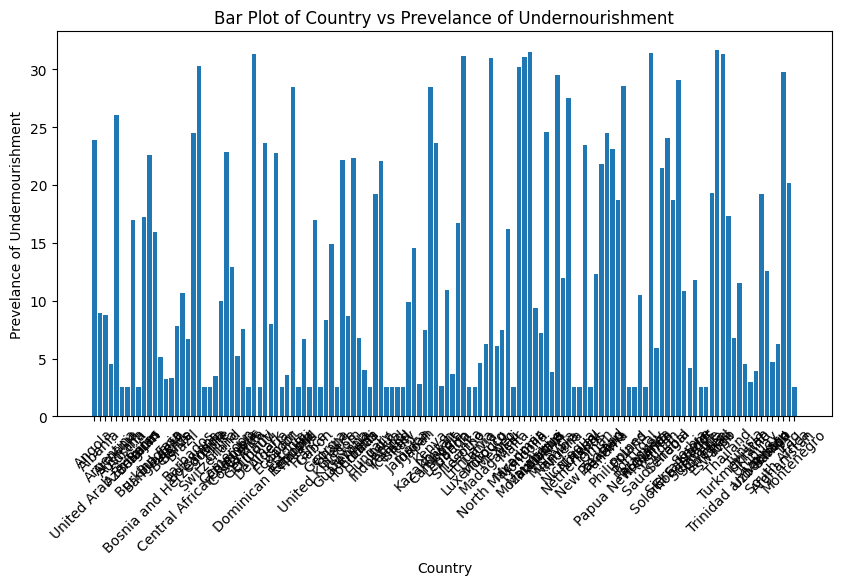

In [86]:
for pair in correlated_pairs_for_Bar_Graphs:
    col1, col2 = pair

    plt.figure(figsize=(10, 5))

    plt.bar(df_eda[col1], df_eda[col2])
    plt.title(f'Bar Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.xticks(rotation=45)

    plt.show()

## Bar graphs of Life Expectancy Vs certain correlated factors

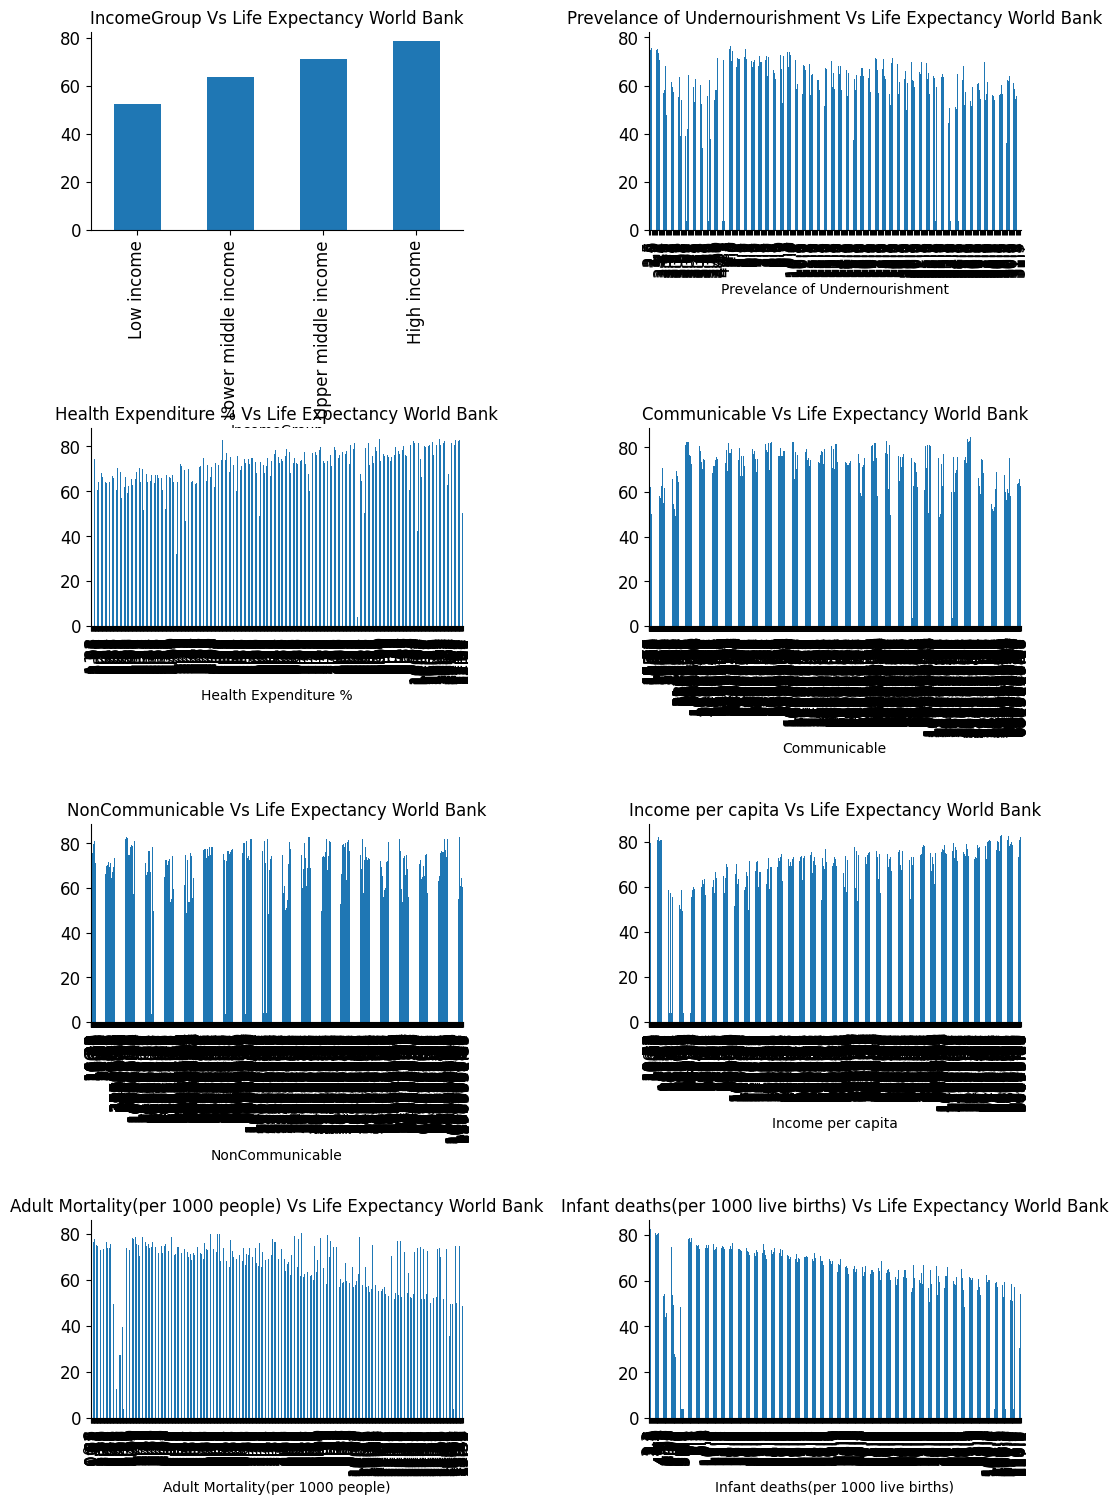

In [55]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))

df_eda.groupby('IncomeGroup')['Life Expectancy World Bank'].mean().sort_values(ascending=True).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("IncomeGroup Vs Life Expectancy World Bank", fontsize=12)
# axarr[0][0].set_xticklabels(axarr[0][0].get_xticklabels(), rotation=90)

df_eda.groupby('Prevelance of Undernourishment')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Prevelance of Undernourishment Vs Life Expectancy World Bank", fontsize=12)
# axarr[0][1].set_xticklabels(axarr[0][1].get_xticklabels(), rotation=90)

df_eda.groupby('Health Expenditure %')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Health Expenditure % Vs Life Expectancy World Bank", fontsize=12)
# axarr[1][0].set_xticklabels(axarr[1][0].get_xticklabels(), rotation=90)

df_eda.groupby('Communicable')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Communicable Vs Life Expectancy World Bank", fontsize=12)
# axarr[1][1].set_xticklabels(axarr[1][1].get_xticklabels(), rotation=90)

df_eda.groupby('NonCommunicable')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("NonCommunicable Vs Life Expectancy World Bank", fontsize=12)
# axarr[2][0].set_xticklabels(axarr[2][0].get_xticklabels(), rotation=90)

df_eda.groupby('Income per capita')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Income per capita Vs Life Expectancy World Bank", fontsize=12)
# axarr[2][1].set_xticklabels(axarr[2][1].get_xticklabels(), rotation=90)

df_eda.groupby('Adult Mortality(per 1000 people)')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Adult Mortality(per 1000 people) Vs Life Expectancy World Bank", fontsize=12)
# axarr[3][0].set_xticklabels(axarr[3][0].get_xticklabels(), rotation=90)

df_eda.groupby('Infant deaths(per 1000 live births)')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Infant deaths(per 1000 live births) Vs Life Expectancy World Bank", fontsize=12)
# axarr[3][1].set_xticklabels(axarr[3][1].get_xticklabels(), rotation=90)

# df_eda.groupby('Infant deaths(per 1000 live births)')['Life Expectancy World Bank'].mean().sort_values(ascending=True).plot.bar(ax=axarr[3][1], fontsize=12)
# axarr[3][1].set_title("Infant deaths(per 1000 live births) Vs Life Expectancy World Bank", fontsize=18)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

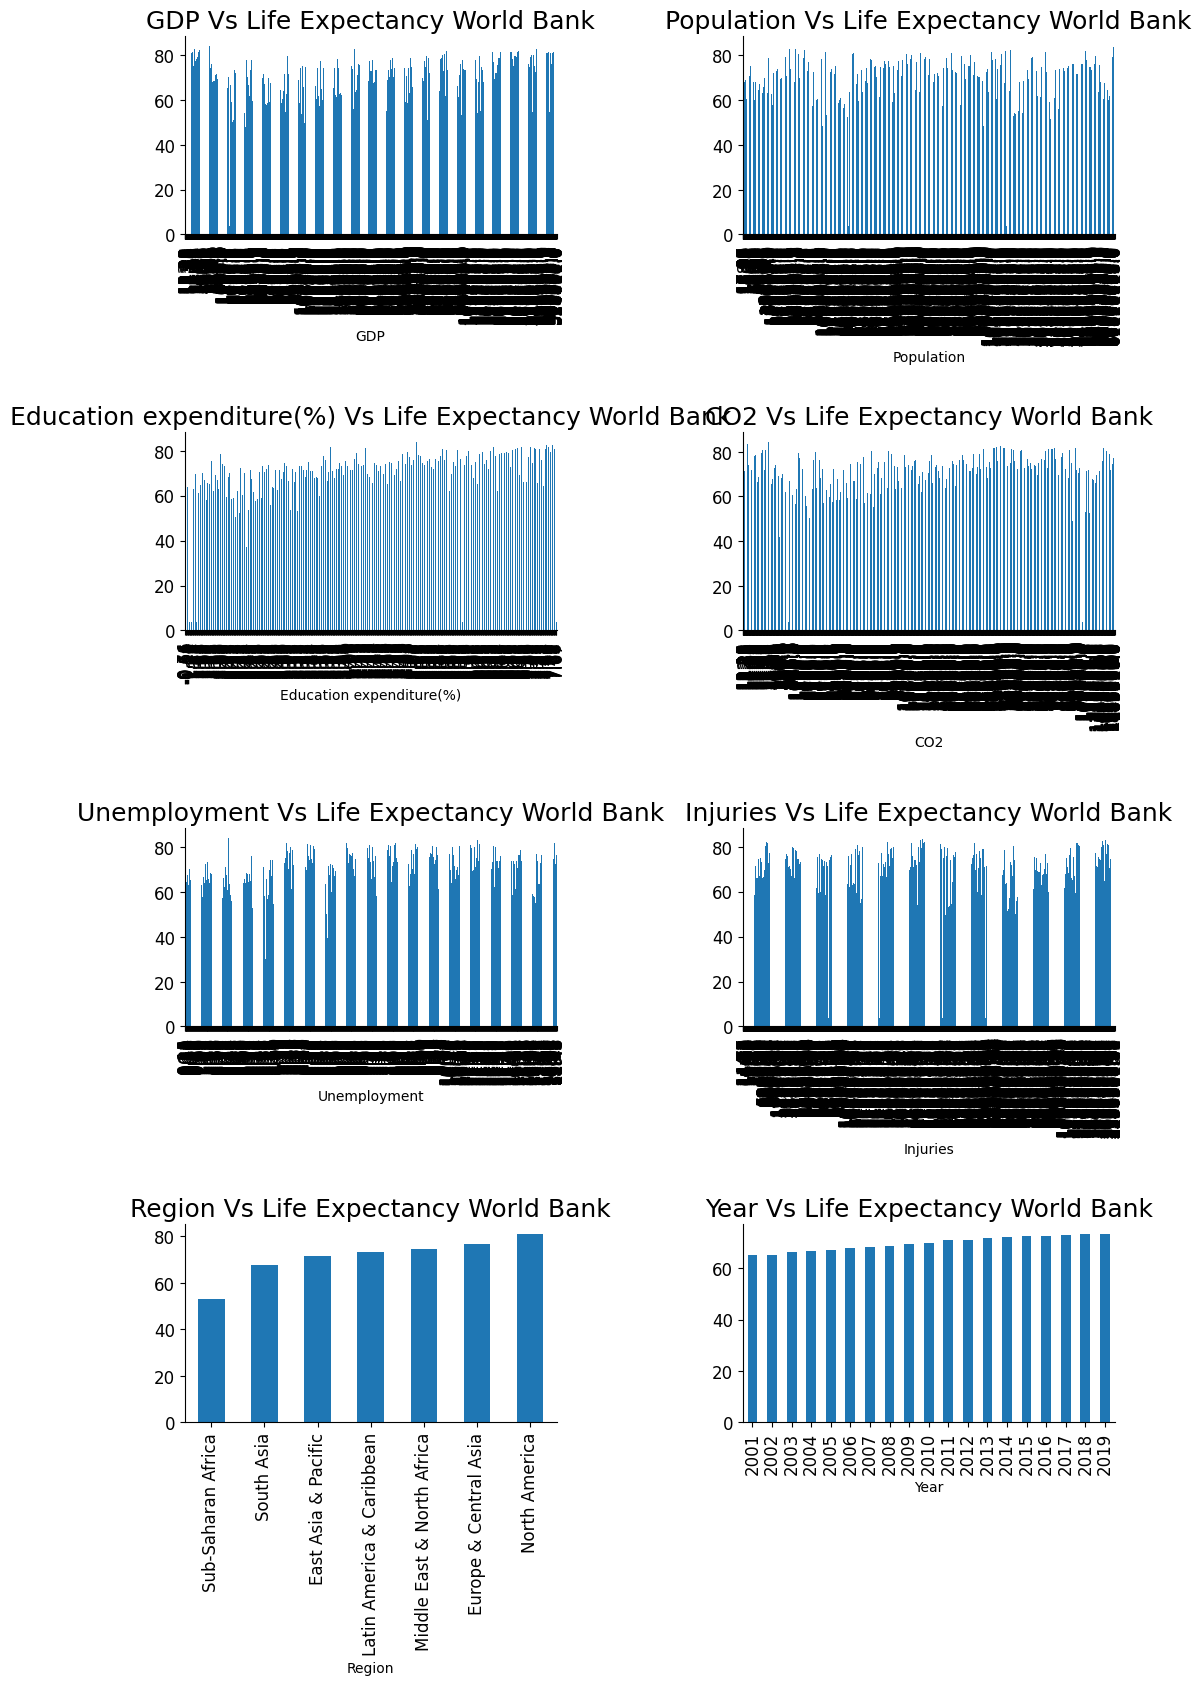

In [56]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))

df_eda.groupby('GDP')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("GDP Vs Life Expectancy World Bank", fontsize=18)
# axarr[0][0].set_xticklabels(axarr[0][0].get_xticklabels(), rotation=90)

df_eda.groupby('Population')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Population Vs Life Expectancy World Bank", fontsize=18)
# axarr[0][1].set_xticklabels(axarr[0][1].get_xticklabels(), rotation=90)

df_eda.groupby('Education expenditure(%)')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Education expenditure(%) Vs Life Expectancy World Bank", fontsize=18)
# axarr[1][0].set_xticklabels(axarr[1][0].get_xticklabels(), rotation=90)

df_eda.groupby('CO2')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("CO2 Vs Life Expectancy World Bank", fontsize=18)
# axarr[1][1].set_xticklabels(axarr[1][1].get_xticklabels(), rotation=90)

df_eda.groupby('Unemployment')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Unemployment Vs Life Expectancy World Bank", fontsize=18)
# axarr[2][0].set_xticklabels(axarr[2][0].get_xticklabels(), rotation=90)

df_eda.groupby('Injuries')['Life Expectancy World Bank'].mean().plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Injuries Vs Life Expectancy World Bank", fontsize=18)
# axarr[2][1].set_xticklabels(axarr[2][1].get_xticklabels(), rotation=90)

df_eda.groupby('Region')['Life Expectancy World Bank'].mean().sort_values(ascending=True).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Region Vs Life Expectancy World Bank", fontsize=18)
# axarr[3][0].set_xticklabels(axarr[3][0].get_xticklabels(), rotation=90)

df_eda.groupby('Year')['Life Expectancy World Bank'].mean().sort_values(ascending=True).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Year Vs Life Expectancy World Bank", fontsize=18)
# axarr[3][1].set_xticklabels(axarr[3][1].get_xticklabels(), rotation=90)


plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

## Bar graphs by Mean Values

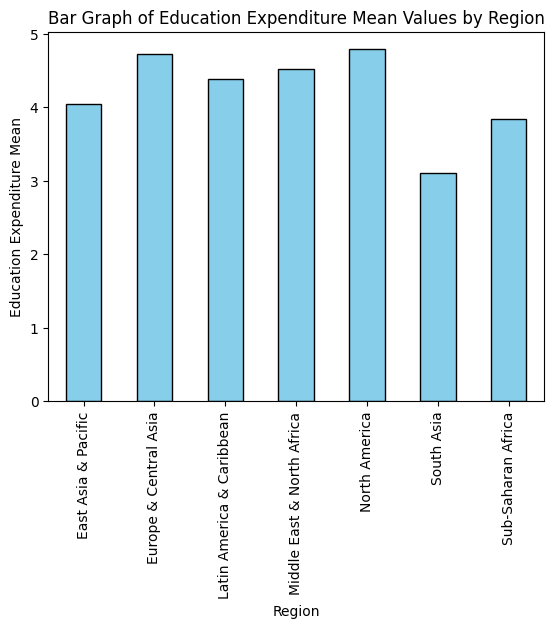

In [57]:
mean_by_category = df_eda.groupby('Region')['Education expenditure(%)'].mean()

fig, ax = plt.subplots()
mean_by_category.plot(kind='bar', color='skyblue', edgecolor='black')

ax.set_xlabel('Region')
ax.set_ylabel('Education Expenditure Mean')
ax.set_title('Bar Graph of Education Expenditure Mean Values by Region')

plt.show()



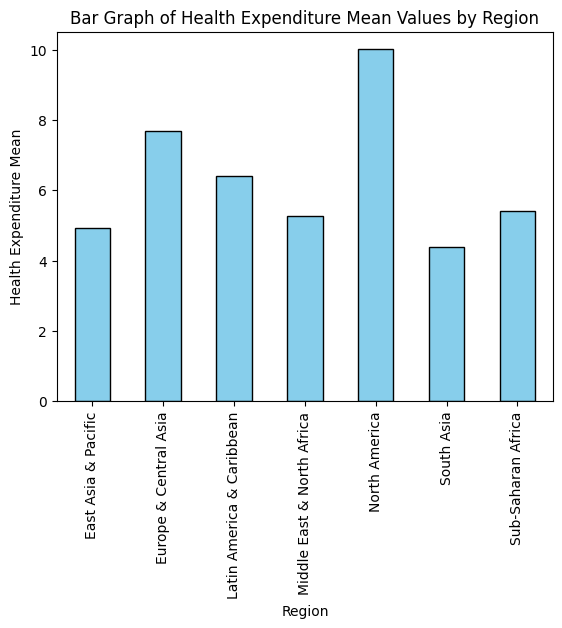

In [58]:
mean_by_category = df_eda.groupby('Region')['Health Expenditure %'].mean()

fig, ax = plt.subplots()
mean_by_category.plot(kind='bar', color='skyblue', edgecolor='black')

ax.set_xlabel('Region')
ax.set_ylabel('Health Expenditure Mean')
ax.set_title('Bar Graph of Health Expenditure Mean Values by Region')

plt.show()

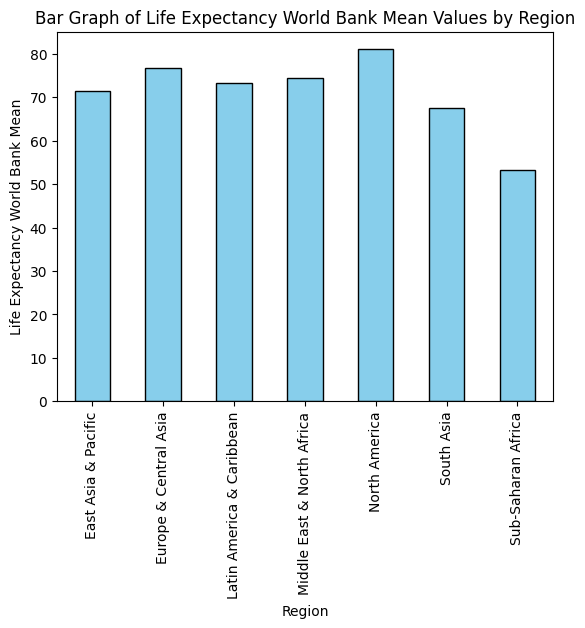

In [59]:
mean_by_category = df_eda.groupby('Region')['Life Expectancy World Bank'].mean()

fig, ax = plt.subplots()
mean_by_category.plot(kind='bar', color='skyblue', edgecolor='black')

ax.set_xlabel('Region')
ax.set_ylabel('Life Expectancy World Bank Mean')
ax.set_title('Bar Graph of Life Expectancy World Bank Mean Values by Region')

plt.show()

## 7. PIE CHARTS FOR CATEGORICAL VALUES

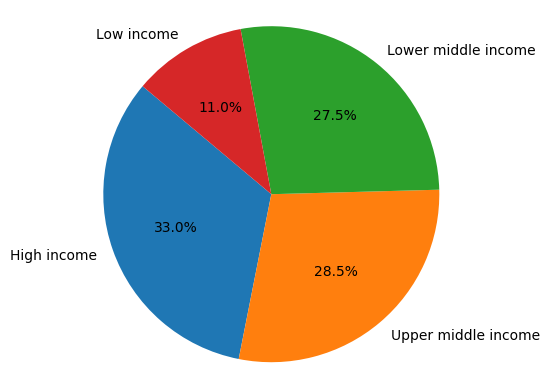

In [60]:
data = IncomeGroup
category_counts = data.value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.show()

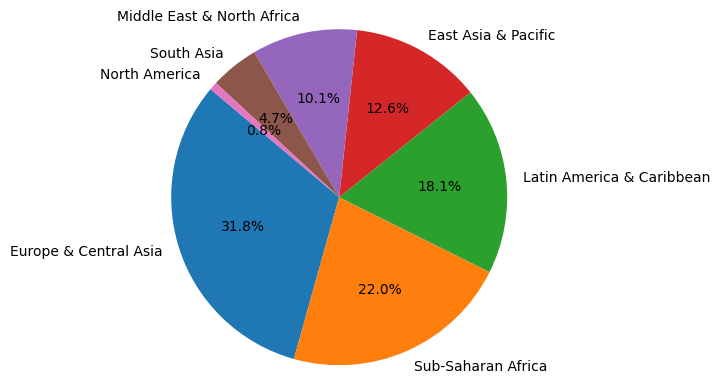

In [61]:
data = Region
category_counts = data.value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.show()

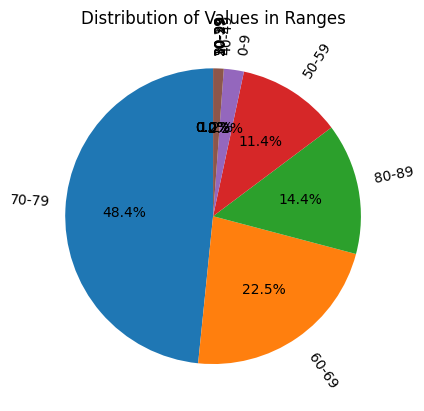

In [65]:
data = Life_Expectancy
category_counts = data.value_counts()

# # run this only the first time
# data['Ranges'] = pd.cut(data, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

range_counts = data['Ranges'].value_counts()

plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=90, rotatelabels=True)
plt.title('Distribution of Values in Ranges')
plt.show()


## 8. VIOLIN PLOTS FOR APPROPRIATE UNDERSTANDING

In [88]:
sel_cols2 = [
 ('Country', 'Health Expenditure %'),
 ('Life Expectancy World Bank', 'Prevelance of Undernourishment'),
 ('Country', 'Income per capita'),
 ('Country', 'NonCommunicable'),
 ('Country', 'Injuries'),
 ('Health Expenditure %', 'Income per capita'),
 ('Country', 'Prevelance of Undernourishment'),
]
correlated_pairs_for_violin_plots = sel_cols2

In [89]:
for pair in correlated_pairs_for_violin_plots:
  str1 = pair[0]
  str2 = pair[1]

  fig = px.violin(df_eda, x=str1, y=str2, color=str1, template='plotly_dark', box=True, title=f'{str2} based on {str1}')
  # fig.update_layout(xaxis=dict(range=[0, 40000]))
  fig.show()

## 9. PYPLOT EXPRESS SCATTER PLOTS

In [96]:
sel_cols3 = [('Communicable', 'Life Expectancy World Bank'),
 ('Communicable', 'Prevelance of Undernourishment'),
 ('Health Expenditure %', 'Country'),
 ('Life Expectancy World Bank', 'Prevelance of Undernourishment'),
 ('Income per capita', 'Country'),
 ('NonCommunicable', 'Country'),
 ('Injuries', 'Country'),
 ('CO2', 'Region'),
 ('Health Expenditure %', 'Income per capita'),
 ('Prevelance of Undernourishment', 'Country'),
 ('CO2', 'Communicable'),
 ('CO2', 'NonCommunicable'),
 ('Income per capita', 'Prevelance of Undernourishment'),
 ('CO2', 'Life Expectancy World Bank'),
 ('Infant deaths(per 1000 live births)', 'Life Expectancy World Bank'),
 ('GDP', 'Life Expectancy World Bank'),
 ('Population', 'Life Expectancy World Bank'),
 ('Education expenditure(%)', 'Life Expectancy World Bank'),

 ('Adult Mortality(per 1000 people)', 'Life Expectancy World Bank'),
 ('Income per capita', 'Life Expectancy World Bank'),
 ('NonCommunicable', 'Life Expectancy World Bank'),
 ('Injuries', 'Life Expectancy World Bank'),
 ('Unemployment', 'Life Expectancy World Bank'),
 ('Health Expenditure %', 'Life Expectancy World Bank')]
px_plot_column_pairs = sel_cols3

#run each of three cells below once to view the plots or please view the report for plots.

In [97]:
for idx in range(0,8):
    str1 = px_plot_column_pairs[idx][0]
    str2 = px_plot_column_pairs[idx][1]

    fig=px.scatter(df_eda,y=str1,x=str2,color=str1,template='plotly_dark',opacity=0.6,title=f'<b> {str1} Versus {str2}')

    fig.show()

In [98]:
for idx in range(8,16):
    str1 = px_plot_column_pairs[idx][0]
    str2 = px_plot_column_pairs[idx][1]

    fig=px.scatter(df_eda,y=str1,x=str2,color=str1,template='plotly_dark',opacity=0.6,title=f'<b> {str1} Versus {str2}')

    fig.show()

In [99]:
for idx in range(16,24):
    str1 = px_plot_column_pairs[idx][0]
    str2 = px_plot_column_pairs[idx][1]

    fig=px.scatter(df_eda,y=str1,x=str2,color=str1,template='plotly_dark',opacity=0.6,title=f'<b> {str1} Versus {str2}')
    # fig=px.scatter(df_eda,y=str1,x=str2,color='Country',template='plotly_dark',opacity=0.6,title=f'<b> {str1} Versus {str2}')

    fig.show()

## 10. TIME SERIES PLOTS AND REGION WISE PLOTS

In [73]:
average_df_year = df_eda.groupby(['Year']).mean().reset_index()
average_df_year

<ipython-input-73-b5cd3318ea4a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Year  Life Expectancy World Bank  Prevelance of Undernourishment  \
0   2001                   65.017040                        9.153280   
1   2002                   65.172460                        8.849524   
2   2003                   66.150630                        8.759055   
3   2004                   66.500157                        8.734488   
4   2005                   67.119134                        8.798740   
5   2006                   67.802992                        8.583858   
6   2007                   68.128976                        8.667717   
7   2008                   68.501969                        8.594803   
8   2009                   69.231575                        8.378819   
9   2010                   69.598189                        8.753780   
10  2011                   70.721641                        7.940625   
11  2012                   71.048828                        7.561172   
12  2013                   71.759453                        7.250078   
13  2014                   72.107969                        7.242344   
14  2015                   72.332344                        7.302344   
15  2016                   72.630078                        7.092109   
16  2017                   72.859766                        7.289219   
17  2018                   73.086406                        7.258047   
18  2019                   73.277244                        7.284173   

             CO2  Health Expenditure %  Unemployment       Injuries  \
0   24497.539600              5.609360      6.927200  382192.953200   
1   24673.751984              5.832302      6.740000  395879.008492   
2   24697.839370              5.901102      6.946535  391839.714016   
3   25470.284803              5.997953      6.942913  387925.519843   
4   25812.964646              5.962520      6.592126  388494.014252   
5   26571.786142              5.915118      6.336220  411831.842126   
6   24100.721811              5.926693      6.126457  410457.357402   
7   24600.645591              6.016929      6.032520  397456.601654   
8   25360.464252              6.451811      6.602283  434744.251969   
9   25075.764094              6.356299      6.684331  441567.704961   
10  25300.331484              6.339922      6.595547  438510.501016   
11  25605.100078              6.340859      6.494297  419942.833125   
12  26015.022734              6.444922      6.799453  419715.983438   
13  26031.425469              6.407734      6.712031  403457.502891   
14  25327.143359              6.532969      6.452109  408899.488672   
15  25976.362422              6.546250      6.321016  401545.284453   
16  26269.723359              6.578828      6.176563  408213.707109   
17  29433.595313              6.530469      6.190937  422985.411406   
18  28511.592283              6.682047      6.077795  425236.517638   

     Communicable  NonCommunicable  Income per capita  \
0   791706.284560     2.010117e+06        5949.464240   
1   769788.907381     1.878455e+06        6235.863175   
2   775114.779055     1.927298e+06        6092.925197   
3   755395.814488     1.947801e+06        5490.370472   
4   737407.020866     1.974390e+06        5755.267953   
5   715140.245669     1.994479e+06        5673.825669   
6   696687.389764     2.015864e+06        5317.966220   
7   680371.054173     2.037819e+06        5799.524488   
8   664204.400079     2.156443e+06        5453.658976   
9   703566.327638     2.177239e+06        6177.150394   
10  734613.755156     2.186288e+06        5979.102656   
11  712541.912344     2.212128e+06        6199.579062   
12  801067.467344     2.238077e+06        6450.713750   
13  840364.710781     2.177320e+06        6232.928750   
14  819746.895859     2.118844e+06        6645.089844   
15  797850.499766     2.151653e+06        5767.634375   
16  775277.841406     2.186561e+06        6185.946016   
17  804463.298906     2.221289e+06        6624.162734   
18  791088.905118     2.271299e+06        6594.035118   

 

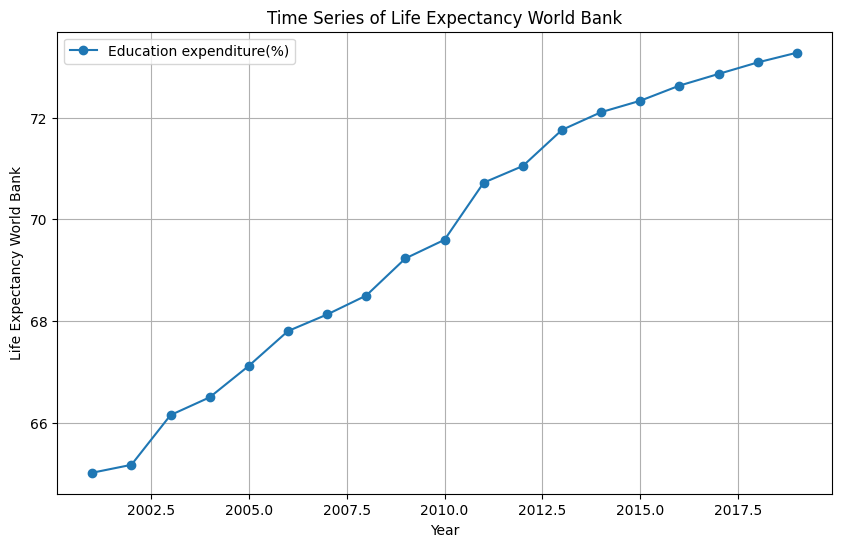

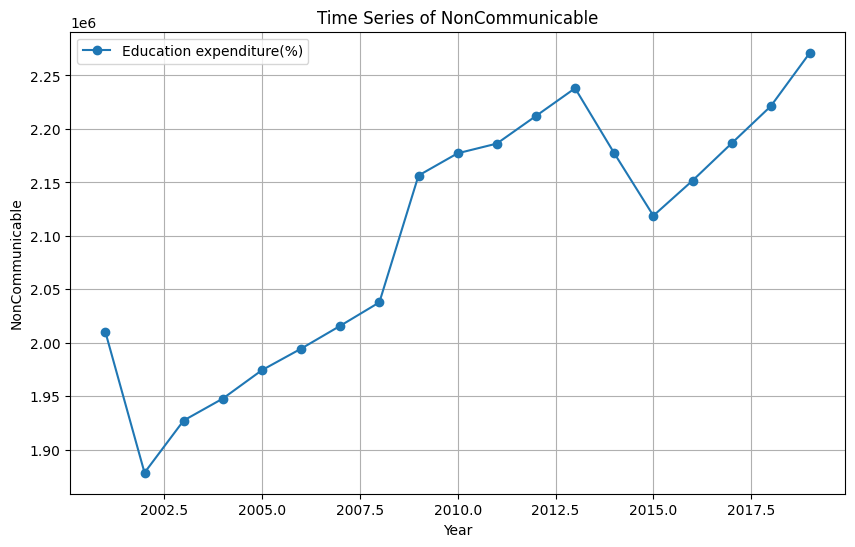

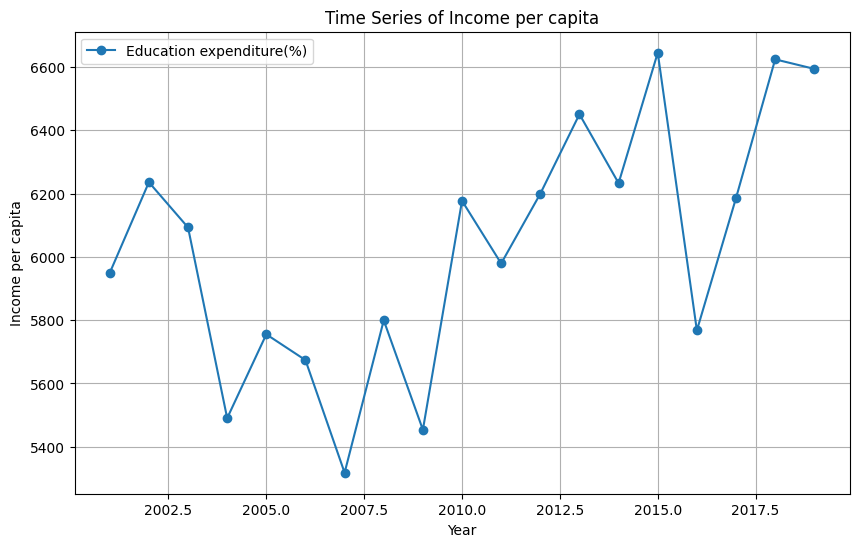

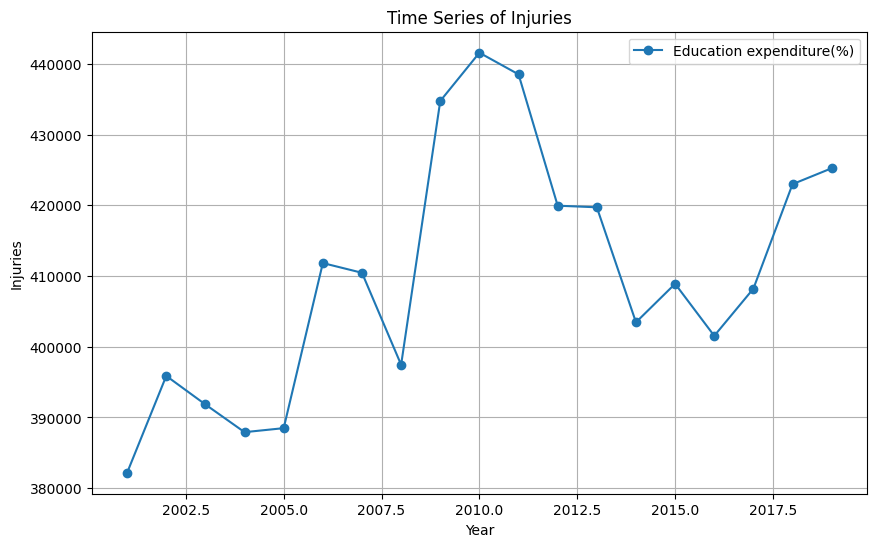

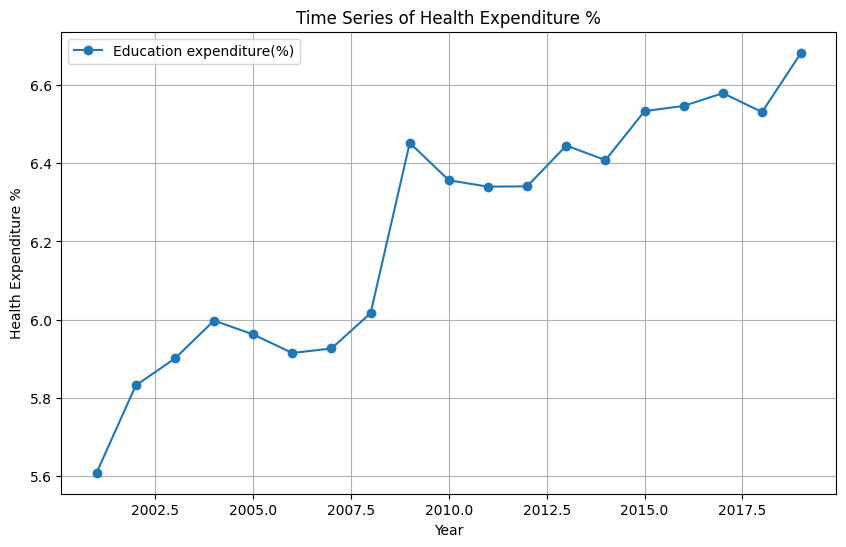

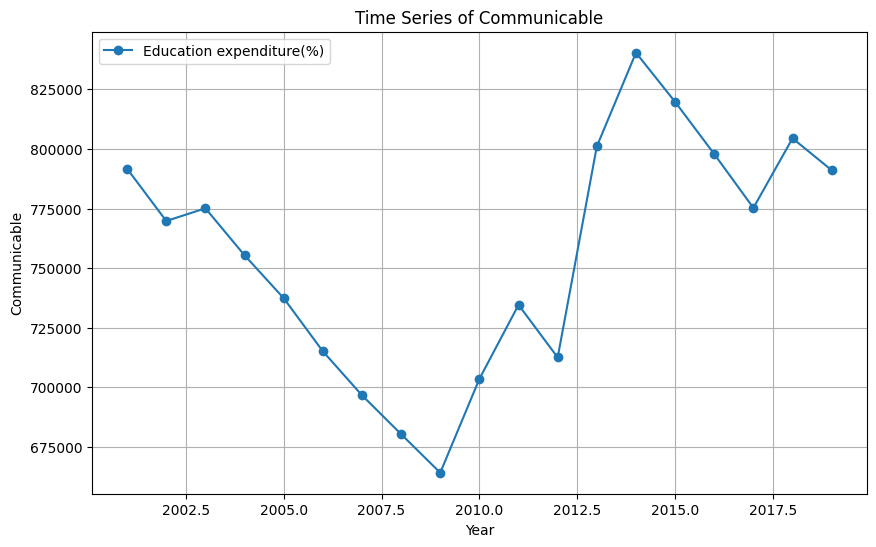

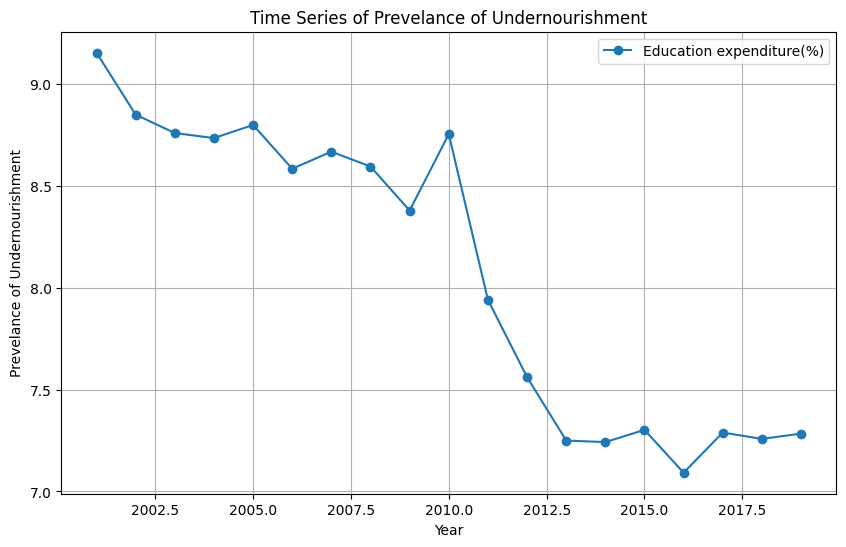

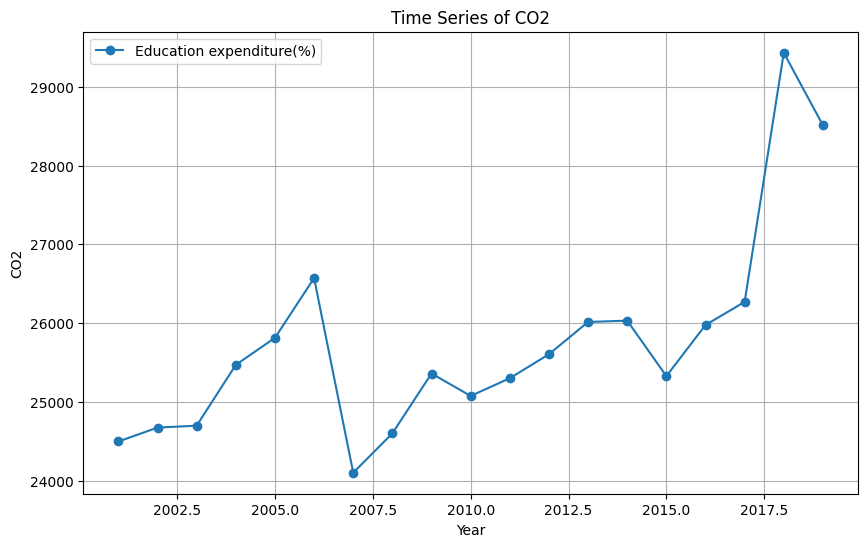

In [74]:
for pair in unique_values:
    if pair in average_df_year.columns:
        plt.figure(figsize=(10, 6))

        plt.plot(average_df_year["Year"], average_df_year[pair], label=str1, marker='o')

        plt.title(f'Time Series of {pair}')
        plt.xlabel('Year')
        plt.ylabel(pair)
        plt.legend()
        plt.grid(True)
        plt.show()

In [75]:
average_df_Region = df_eda.groupby(['Region']).mean().reset_index()
average_df_Region

<ipython-input-75-f2e1b45ab162>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Region         Year  Life Expectancy World Bank  \
0         East Asia & Pacific  2010.000000                   71.463750   
1       Europe & Central Asia  2010.046875                   76.721393   
2   Latin America & Caribbean  2010.000000                   73.360435   
3  Middle East & North Africa  2010.069388                   74.401469   
4               North America  2010.000000                   80.996316   
5                  South Asia  2010.079646                   67.578761   
6          Sub-Saharan Africa  2010.000000                   53.193759   

   Prevelance of Undernourishment           CO2  Health Expenditure %  \
0                        9.357105  15319.192039              4.931382   
1                        3.268490  35627.253893              7.699766   
2                        9.079519  21487.441419              6.396156   
3                        6.811592  51778.212857              5.271633   
4                        2.500000     13.216316             10.012105   
5                       14.235929  34182.439292              4.392035   
6                       12.928628   8128.111222              5.418083   

   Unemployment       Injuries  Communicable  NonCommunicable  \
0      3.525197  254391.999079  8.108925e+05     1.246281e+06   
1      7.961133  447277.440768  3.247403e+05     2.147610e+06   
2      7.437895  376012.677803  7.759802e+05     1.742688e+06   
3      7.545837  474053.236327  6.545495e+05     2.301617e+06   
4      6.937895  859982.185263  4.071373e+05     7.463148e+06   
5      4.998850  412376.069646  1.239470e+06     2.517924e+06   
6      5.198966  427375.639436  1.288139e+06     2.437540e+06   

   Income per capita  Adult Mortality(per 1000 people)  \
0        4616.789013                          6.720888   
1        8542.115247                          9.818294   
2        6585.421304                          6.267071   
3        9822.685184                          4.640694   
4        7634.446842                          7.221053   
5        1139.038761                          7.375044   
6        2006.298308                          9.389944   

   Education expenditure(%)    Population            GDP  \
0                  4.041086  8.218104e+06   70492.100493   
1                  4.721706  1.070852e+07  104529.010456   
2                  4.382403  9.043230e+06   52692.711968   
3                  4.517429  1.247701e+07  104401.599143   
4                  4.788421  3.113580e+07      14.146316   
5                  3.101239  1.177493e+07   87331.692124   
6                  3.841936  1.188069e+07   37924.438440   

   Infant deaths(per 1000 live births)  
0                            26.440789  
1                             9.471354  
2                            23.602220  
3                            21.571837  
4                             5.726316  
5                            56.312389  
6                            55.437011

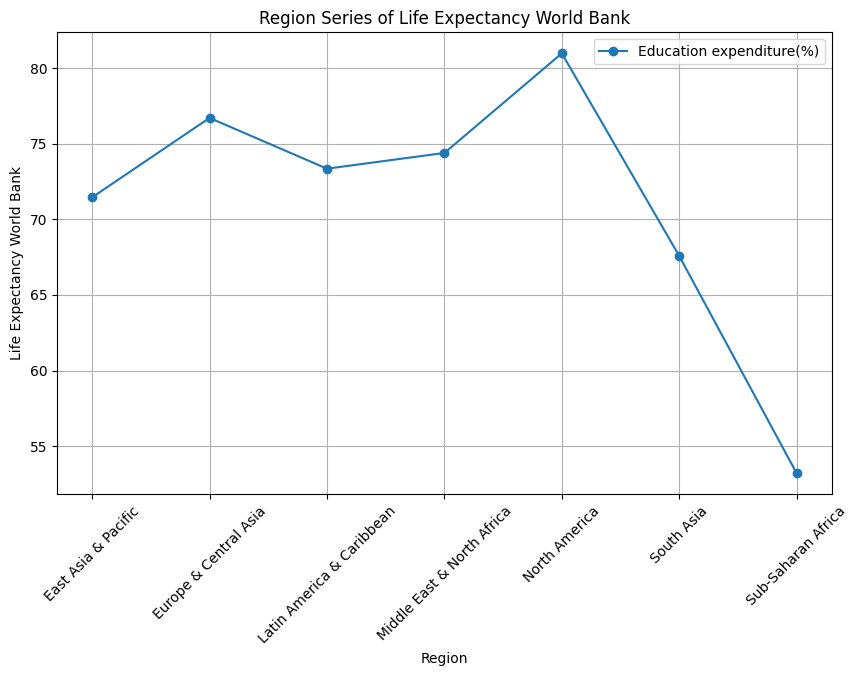

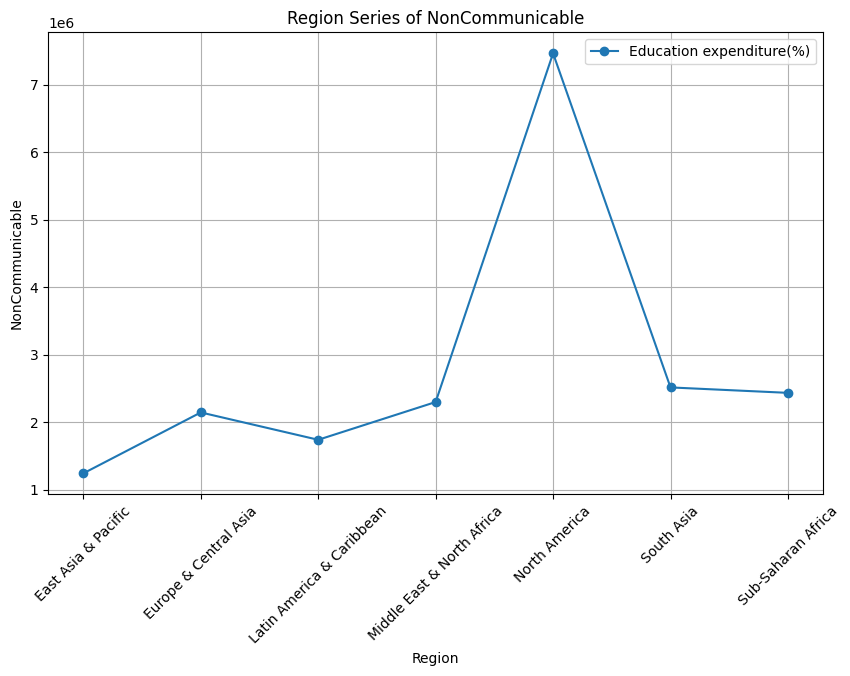

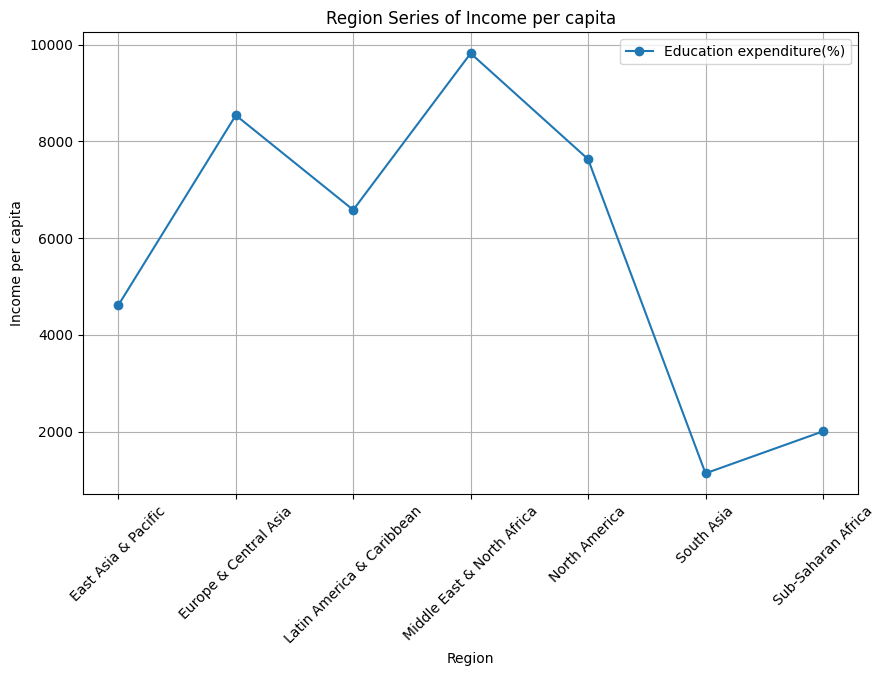

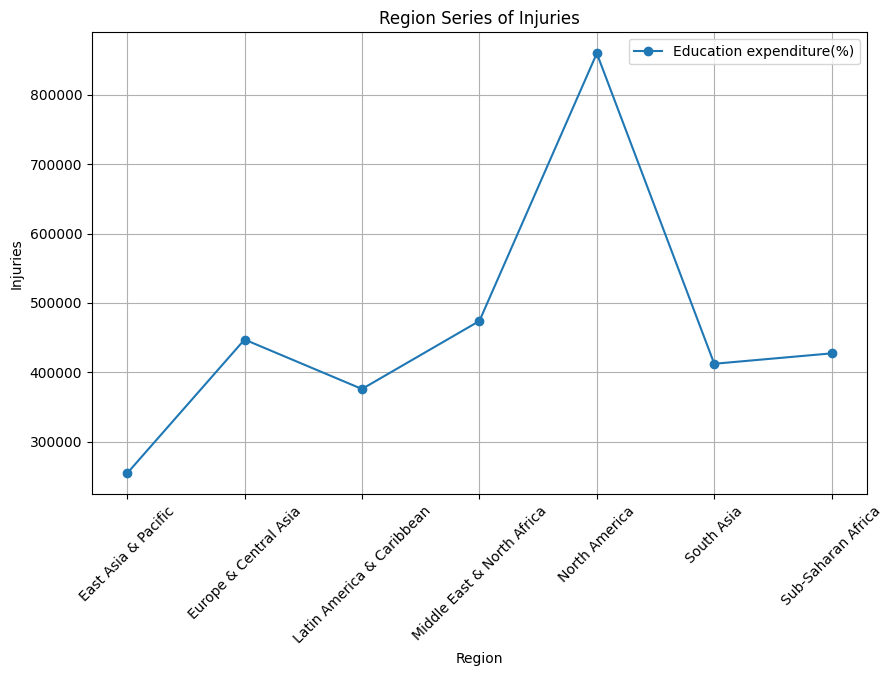

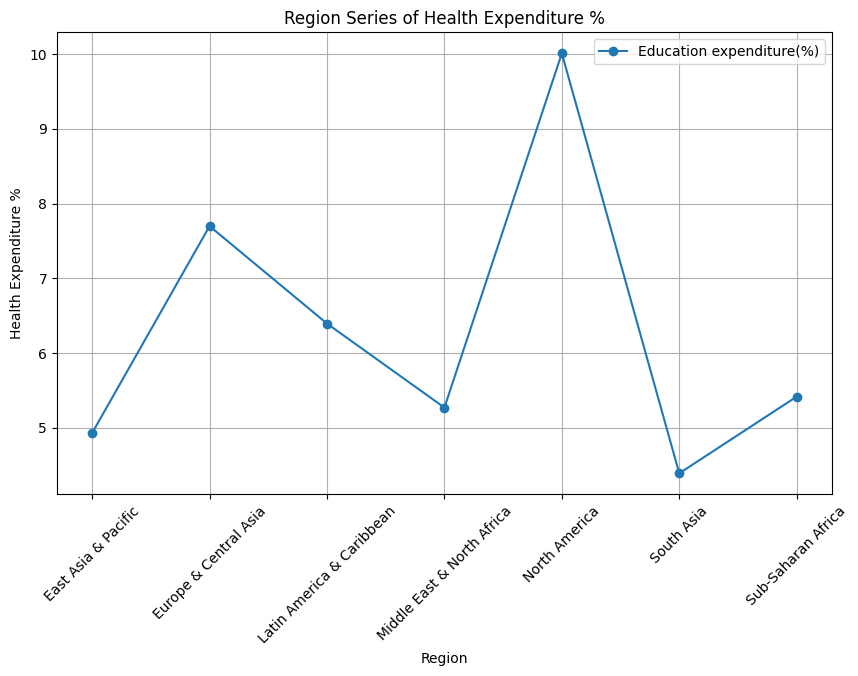

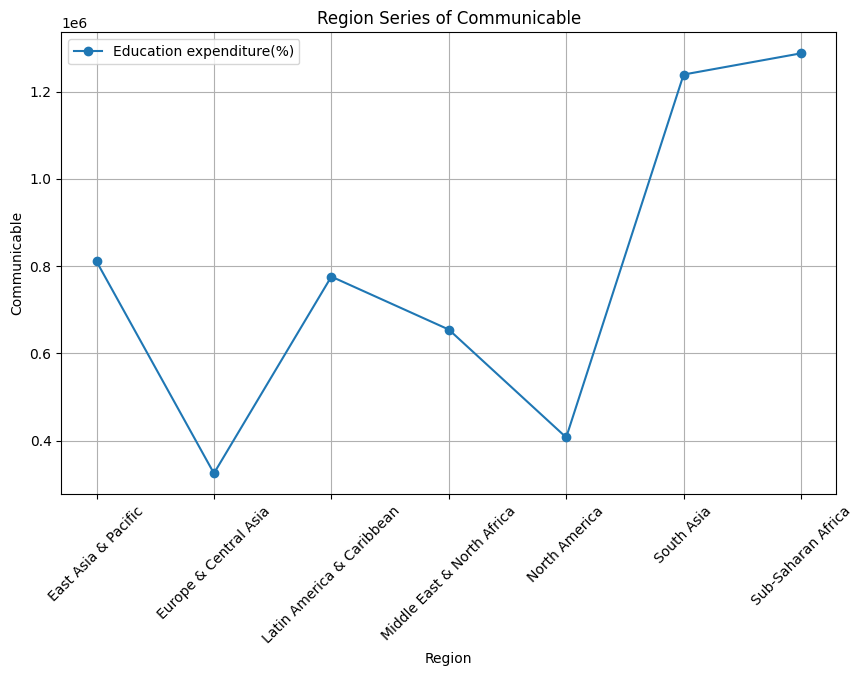

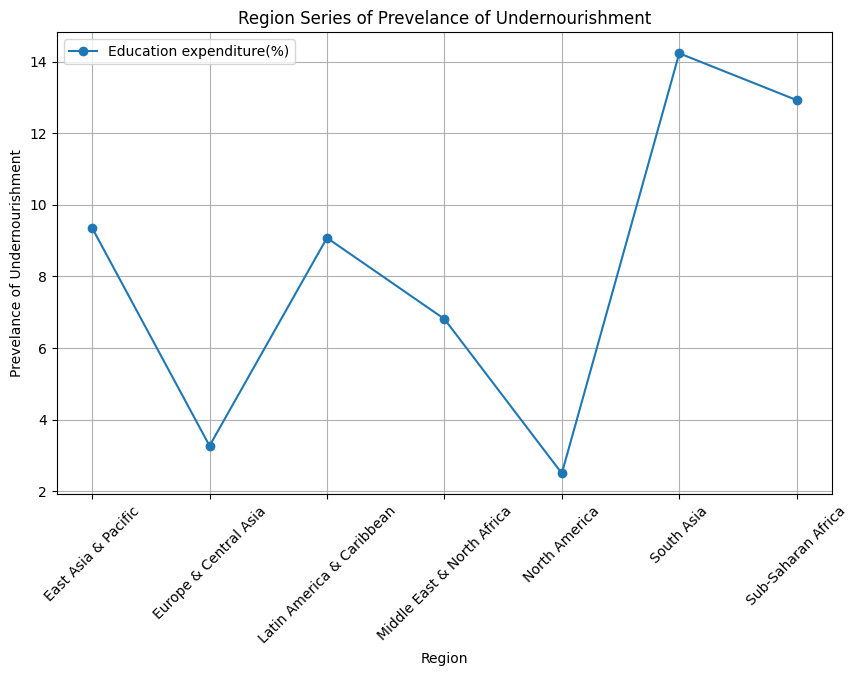

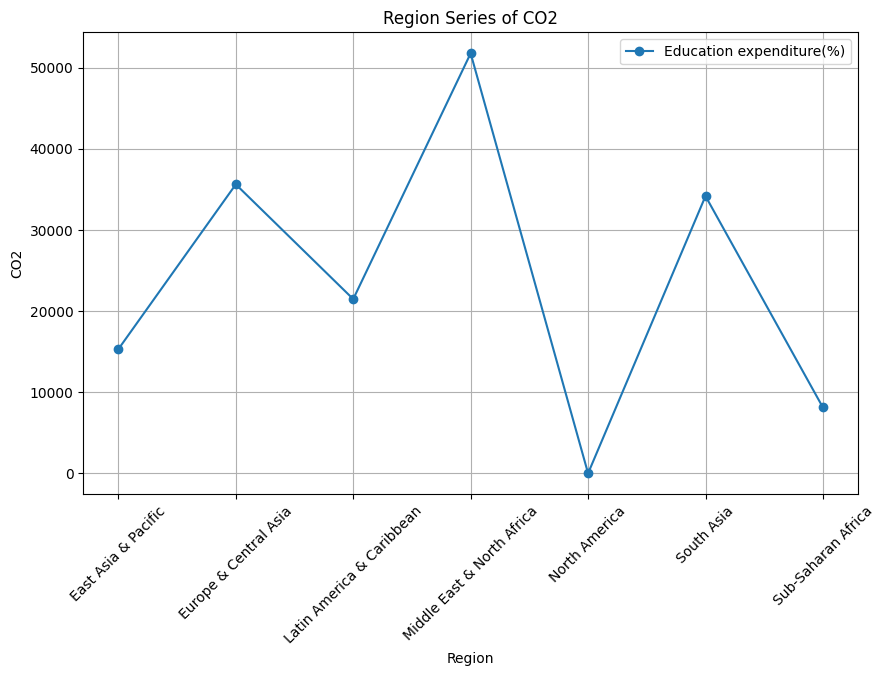

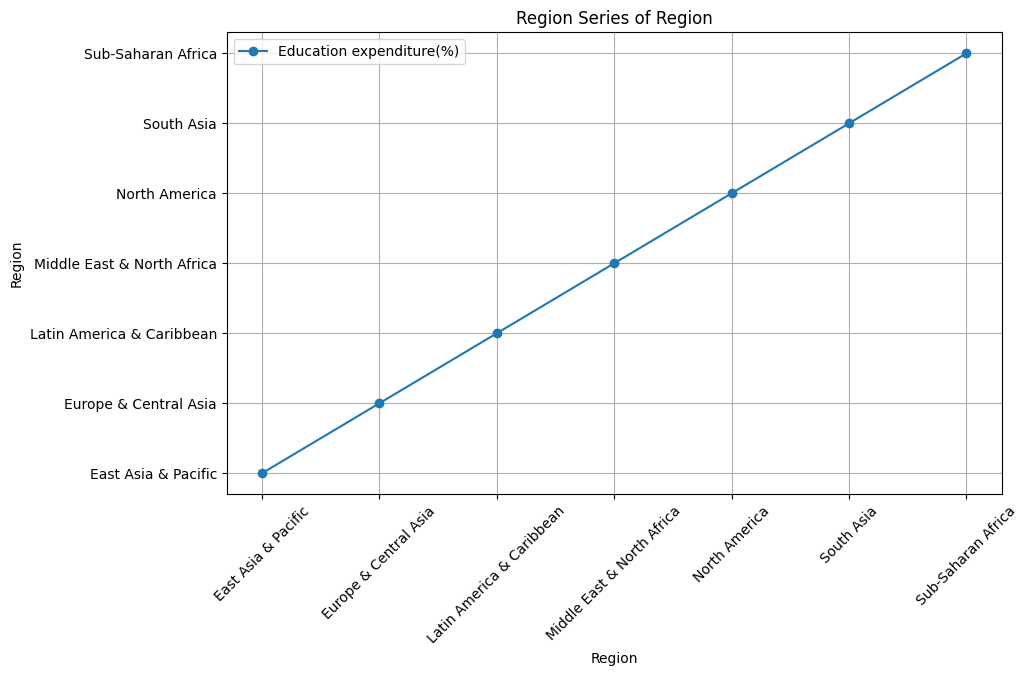

In [77]:
for pair in unique_values:
    if pair in average_df_Region.columns:
        plt.figure(figsize=(10, 6))

        plt.plot(average_df_Region["Region"], average_df_Region[pair], label=str1, marker='o')

        plt.title(f'Region Series of {pair}')
        plt.xlabel('Region')
        plt.ylabel(pair)
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.show()

# Last 2 data cleaning steps

# 9.Encoding categorical features

In [6]:
conv_cols=['Region','IncomeGroup']
for i in main_df[conv_cols]:
    main_df[i]=main_df[i].astype('category')
    main_df[i]=main_df[i].cat.codes
    main_df[i]=main_df[i].astype('uint64')

In [7]:
main_df.head(4)

Country Country Code  Region  IncomeGroup  Year  \
0                Angola          AGO       6            2  2001   
1               Albania          ALB       1            3  2001   
2  United Arab Emirates          ARE       3            0  2001   
3             Argentina          ARG       2            3  2001   

   Life Expectancy World Bank  Prevelance of Undernourishment       CO2  \
0                        3.85                            4.21   15960.0   
1                       74.29                            4.90    3230.0   
2                       74.54                            2.80   97200.0   
3                       73.76                            3.00  125260.0   

   Health Expenditure %  Unemployment    Injuries  Communicable  \
0                  4.48          4.00  1392080.71         16.23   
1                  7.14         18.58   117081.67     140894.78   
2                  2.48          2.49   144678.14      65271.91   
3                  8.37         17.32  1397676.07    1507068.98   

   NonCommunicable  Income per capita  Adult Mortality(per 1000 people)  \
0       2663516.34             527.33                              2.88   
1        532324.75            1281.66                              5.87   
2        481740.70           31280.76                              2.05   
3       8070909.52            7208.37                              7.55   

   Education expenditure(%)  Population       GDP  \
0                      4.37  16945753.0   10930.0   
1                      3.46   3129701.0    3928.0   
2                      4.37   3302722.0  103312.0   
3                      4.83  37275644.0  300421.0   

   Infant deaths(per 1000 live births)  
0                                 5.29  
1                                25.80  
2                                10.90  
3                                19.00

# 10.Normalizing the dataset

In [9]:
normalize_feat=['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Unemployment', 'Injuries', 'Communicable',
       'NonCommunicable', 'Income per capita',
       'Adult Mortality(per 1000 people)', 'Education expenditure(%)',
       'Population', 'GDP', 'Infant deaths(per 1000 live births)']

In [10]:
for i in main_df[normalize_feat]:
    main_df[i]=(main_df[i]-main_df[i].min())/(main_df[i].max()-main_df[i].min())

In [11]:
main_df.head(5)

Country Country Code  Region  IncomeGroup  Year  \
0                Angola          AGO       6            2  2001   
1               Albania          ALB       1            3  2001   
2  United Arab Emirates          ARE       3            0  2001   
3             Argentina          ARG       2            3  2001   
4               Armenia          ARM       1            3  2001   

   Life Expectancy World Bank  Prevelance of Undernourishment       CO2  \
0                    0.001860                        0.058562  0.084448   
1                    0.875155                        0.082192  0.017039   
2                    0.878254                        0.010274  0.514636   
3                    0.868584                        0.017123  0.663221   
4                    0.844285                        0.808219  0.018999   

   Health Expenditure %  Unemployment  Injuries  Communicable  \
0              0.233449      0.199380  0.580556  7.024626e-08   
1              0.465157      0.952479  0.048822  2.061713e-02   
2              0.059233      0.121384  0.060331  9.550002e-03   
3              0.572300      0.887397  0.582890  2.205518e-01   
4              0.248258      0.556302  0.043105  1.788680e-02   

   NonCommunicable  Income per capita  Adult Mortality(per 1000 people)  \
0         0.222639           0.014050                          0.140921   
1         0.044495           0.034556                          0.343496   
2         0.040267           0.850071                          0.084688   
3         0.674637           0.195671                          0.457317   
4         0.064188           0.018592                          0.510840   

   Education expenditure(%)  Population       GDP  \
0                  0.608541    0.277253  0.020754   
1                  0.500593    0.051205  0.007443   
2                  0.608541    0.054036  0.196385   
3                  0.663108    0.609875  0.571117   
4                  0.383155    0.049913  0.004002   

   Infant deaths(per 1000 live births)  
0                             0.025887  
1                             0.203463  
2                             0.074459  
3                             0.144589  
4                             0.232900

In [12]:
main_df.to_csv('Life Expectancy Dataset(cleaned_encoded_normalized).csv', index=False)